# MODEL - DISEASE PREDICTION

## 0- Importing Libraries 

In [1]:
import sklearn
print(sklearn.__version__)


1.3.0


In [2]:
#Importing basic ML libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

##Importing Libraries from matplotlib to visualize the data
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Libraries to perform calculations
import numpy as np
import pandas as pd
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
 
%matplotlib inline

In [3]:
#file names

Train_Data="SBOMCN_train_model_c_1_changed.csv"
#Train_Data_2="SBOMCN_train_model_2.csv"
Train_Data_2=Train_Data
Test_Data="SBOMCN_test_1_changed.csv"

## 1- List of symptoms and diseases 

In [4]:
#List of the symptoms is listed here in list l1.

l1=['Easy_or_excessive_Bruising','Easy_or_excessive_Bleeding','Petechiae(small_red_or_purple_dots_on_the_skin)',
    'Fatigue','Enlarged_spleen','Pain_tingling_burning_sensations_in_the_hands_and_feet',
    'Skin_rash','Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea))',
    'Eye_problems(such_as_cloudiness_or_a_corneal_opacity)',
    'Hearing_loss_or_Heart_problems_or_Kidney_problems',
    'Only_Prolonged_diarrhea','Wet_cough','Frequent_lung(or_sinus)infections','Poor_growth_and_failure_to_gain_weight',
    'Male_infertility','Shortness_of_breath','Loss_of_appetite_&_abdominal_pain',
    'Yellowing_of_the_skin(or_the_whites_of_the_eye)(jaundice)','Fluid_buildup_in_the_legs_or_abdomen',
    'Golden_brown_eye_discoloration(Kayser-Fleischer_rings)','Uncontrolled_movements_or_muscle_stiffness_or_tremors',
    'Problems_with_speech,swallowing_or_physical_coordination','Dry_cough','Weight_loss','Aching_muscles_&_joints',
    'Widening_rounding_of_the_tips_of_fingers/toes(clubbing)','Weight_and_muscle_loss',
    'Drooping_of_the_eyelids_and_tingling_sensations_in_the_limbs','Digestive_problems','Encephalopathy(brain_damage)',
    'Progressive_difficulty_speaking_and_swallowing','High_fever_104F(40C)','Severe_Headache','Muscle,bone_or_joint_pain',
    'Nausea_or_Vomiting(fever)','Pain_behind_the_eyes','Swollen_glands','Itchy(blister_rash)','Fever','Loss_of_appetite',
    'Headache','Chronic_cough_or_Hoarseness','Chest_pain','Unexplained_weight_loss','Cough_with_blood','Night_sweats_or_chills']


#Printing
print("No. of symptoms considered: ", len(l1))
print("\nSymptoms are: ", l1)

No. of symptoms considered:  46

Symptoms are:  ['Easy_or_excessive_Bruising', 'Easy_or_excessive_Bleeding', 'Petechiae(small_red_or_purple_dots_on_the_skin)', 'Fatigue', 'Enlarged_spleen', 'Pain_tingling_burning_sensations_in_the_hands_and_feet', 'Skin_rash', 'Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea))', 'Eye_problems(such_as_cloudiness_or_a_corneal_opacity)', 'Hearing_loss_or_Heart_problems_or_Kidney_problems', 'Only_Prolonged_diarrhea', 'Wet_cough', 'Frequent_lung(or_sinus)infections', 'Poor_growth_and_failure_to_gain_weight', 'Male_infertility', 'Shortness_of_breath', 'Loss_of_appetite_&_abdominal_pain', 'Yellowing_of_the_skin(or_the_whites_of_the_eye)(jaundice)', 'Fluid_buildup_in_the_legs_or_abdomen', 'Golden_brown_eye_discoloration(Kayser-Fleischer_rings)', 'Uncontrolled_movements_or_muscle_stiffness_or_tremors', 'Problems_with_speech,swallowing_or_physical_coordination', 'Dry_cough', 'Weight_loss', 'Aching_muscles_&_joints', '

In [5]:
#List of Diseases is listed in list disease.

disease=['Immune thrombocytopenia','Fabri Disease','Cystic Fibrosis','Wilson\'s Disease','Pulmonary Fibrosis',
         'MNGIE(Mitochondrial Neurogastrointestinal Encephalomyopathy)','Dengue','Chicken pox','Lung Cancer','Tuberculosis']

#Printing
print("No. of diseases considered: ", len(disease))
print("\nDiseases are: ", disease)

No. of diseases considered:  10

Diseases are:  ['Immune thrombocytopenia', 'Fabri Disease', 'Cystic Fibrosis', "Wilson's Disease", 'Pulmonary Fibrosis', 'MNGIE(Mitochondrial Neurogastrointestinal Encephalomyopathy)', 'Dengue', 'Chicken pox', 'Lung Cancer', 'Tuberculosis']


In [6]:
#List l2 for labeling symptoms
l2=[]
for i in range(0,len(l1)):
    l2.append(i)
print(l2)
print(type(l2),type(l2[0]))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
<class 'list'> <class 'int'>


## 2- Reading dataset and creating dataframes

In [7]:
#Reading the csv file
df=pd.read_csv(Train_Data_2,encoding='latin-1')
print("Shape of dataframe:", df.shape)
df.head()

Shape of dataframe: (407, 47)


,disease,Easy_or_excessive_Bruising,Easy_or_excessive_Bleeding,Petechiae(small_red_or_purple_dots_on_the_skin),Fatigue,Enlarged_spleen,Pain_tingling_burning_sensations_in_the_hands_and_feet,Skin_rash,Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea)),Eye_problems(such_as_cloudiness_or_a_corneal_opacity),...,Swollen_glands,Itchy(blister_rash),Fever,Loss_of_appetite,Headache,Chronic_cough_or_Hoarseness,Chest_pain,Unexplained_weight_loss,Cough_with_blood,Night_sweats_or_chills
0,Immune thrombocytopenia,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Immune thrombocytopenia,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Immune thrombocytopenia,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Immune thrombocytopenia,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Immune thrombocytopenia,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
DF= pd.read_csv(Train_Data_2, index_col= 'disease')
print("Shape of dataframe:", DF.shape)
DF.head()

Shape of dataframe: (407, 46)


,Easy_or_excessive_Bruising,Easy_or_excessive_Bleeding,Petechiae(small_red_or_purple_dots_on_the_skin),Fatigue,Enlarged_spleen,Pain_tingling_burning_sensations_in_the_hands_and_feet,Skin_rash,Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea)),Eye_problems(such_as_cloudiness_or_a_corneal_opacity),Hearing_loss_or_Heart_problems_or_Kidney_problems,...,Swollen_glands,Itchy(blister_rash),Fever,Loss_of_appetite,Headache,Chronic_cough_or_Hoarseness,Chest_pain,Unexplained_weight_loss,Cough_with_blood,Night_sweats_or_chills
disease,,,,,,,,,,,,,,,,,,,,,
Immune thrombocytopenia,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Immune thrombocytopenia,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Immune thrombocytopenia,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Immune thrombocytopenia,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Immune thrombocytopenia,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3- Exploratory Data Analysis 

### i- Checking end of dataframe 

In [9]:
df.tail()

,disease,Easy_or_excessive_Bruising,Easy_or_excessive_Bleeding,Petechiae(small_red_or_purple_dots_on_the_skin),Fatigue,Enlarged_spleen,Pain_tingling_burning_sensations_in_the_hands_and_feet,Skin_rash,Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea)),Eye_problems(such_as_cloudiness_or_a_corneal_opacity),...,Swollen_glands,Itchy(blister_rash),Fever,Loss_of_appetite,Headache,Chronic_cough_or_Hoarseness,Chest_pain,Unexplained_weight_loss,Cough_with_blood,Night_sweats_or_chills
402,Tuberculosis,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,1,1,1
403,Tuberculosis,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,1,1
404,Tuberculosis,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,1
405,Tuberculosis,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
406,Tuberculosis,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,1,1,1


In [10]:
DF.tail()

,Easy_or_excessive_Bruising,Easy_or_excessive_Bleeding,Petechiae(small_red_or_purple_dots_on_the_skin),Fatigue,Enlarged_spleen,Pain_tingling_burning_sensations_in_the_hands_and_feet,Skin_rash,Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea)),Eye_problems(such_as_cloudiness_or_a_corneal_opacity),Hearing_loss_or_Heart_problems_or_Kidney_problems,...,Swollen_glands,Itchy(blister_rash),Fever,Loss_of_appetite,Headache,Chronic_cough_or_Hoarseness,Chest_pain,Unexplained_weight_loss,Cough_with_blood,Night_sweats_or_chills
disease,,,,,,,,,,,,,,,,,,,,,
Tuberculosis,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,1,1,1
Tuberculosis,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,1,1
Tuberculosis,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,1
Tuberculosis,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
Tuberculosis,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,1,1,1,1


###  ii- Exploring contents of dataframe (df)

In [11]:
df.describe()

,Easy_or_excessive_Bruising,Easy_or_excessive_Bleeding,Petechiae(small_red_or_purple_dots_on_the_skin),Fatigue,Enlarged_spleen,Pain_tingling_burning_sensations_in_the_hands_and_feet,Skin_rash,Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea)),Eye_problems(such_as_cloudiness_or_a_corneal_opacity),Hearing_loss_or_Heart_problems_or_Kidney_problems,...,Swollen_glands,Itchy(blister_rash),Fever,Loss_of_appetite,Headache,Chronic_cough_or_Hoarseness,Chest_pain,Unexplained_weight_loss,Cough_with_blood,Night_sweats_or_chills
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,...,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,0.039312,0.039312,0.039312,0.171990,0.039312,0.076167,0.076167,0.152334,0.076167,0.076167,...,0.078624,0.036855,0.058968,0.019656,0.019656,0.036855,0.058968,0.058968,0.058968,0.076167
std,0.194575,0.194575,0.194575,0.377836,0.194575,0.265592,0.265592,0.359787,0.265592,0.265592,...,0.269482,0.188638,0.235855,0.138986,0.138986,0.188638,0.235855,0.235855,0.235855,0.265592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.columns

Index(['disease', 'Easy_or_excessive_Bruising', 'Easy_or_excessive_Bleeding',
       'Petechiae(small_red_or_purple_dots_on_the_skin)', 'Fatigue',
       'Enlarged_spleen',
       'Pain_tingling_burning_sensations_in_the_hands_and_feet', 'Skin_rash',
       'Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea))',
       'Eye_problems(such_as_cloudiness_or_a_corneal_opacity)',
       'Hearing_loss_or_Heart_problems_or_Kidney_problems',
       'Only_Prolonged_diarrhea', 'Wet_cough',
       'Frequent_lung(or_sinus)infections',
       'Poor_growth_and_failure_to_gain_weight', 'Male_infertility',
       'Shortness_of_breath', 'Loss_of_appetite_&_abdominal_pain',
       'Yellowing_of_the_skin(or_the_whites_of_the_eye)(jaundice)',
       'Fluid_buildup_in_the_legs_or_abdomen',
       'Golden_brown_eye_discoloration(Kayser-Fleischer_rings)',
       'Uncontrolled_movements_or_muscle_stiffness_or_tremors',
       'Problems_with_speech,swallowing_or_physic

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 47 columns):
 #   Column                                                                                          Non-Null Count  Dtype 
---  ------                                                                                          --------------  ----- 
 0   disease                                                                                         407 non-null    object
 1   Easy_or_excessive_Bruising                                                                      407 non-null    int64 
 2   Easy_or_excessive_Bleeding                                                                      407 non-null    int64 
 3   Petechiae(small_red_or_purple_dots_on_the_skin)                                                 407 non-null    int64 
 4   Fatigue                                                                                         407 non-null    int64 
 5   Enlarged_spleen       

### iii- Checking for redundant values

In [14]:
#Displays the various uniques values for each column
for col in df.columns:
    print(col, df[col].unique())

disease ['Immune thrombocytopenia' 'Fabri Disease' 'Cystic Fibrosis'
 "Wilson's Disease" 'Pulmonary Fibrosis'
 'MNGIE(Mitochondrial Neurogastrointestinal Encephalomyopathy)' 'Dengue'
 'Chicken pox' 'Lung Cancer' 'Tuberculosis']
Easy_or_excessive_Bruising [1 0]
Easy_or_excessive_Bleeding [0 1]
Petechiae(small_red_or_purple_dots_on_the_skin) [0 1]
Fatigue [0 1]
Enlarged_spleen [0 1]
Pain_tingling_burning_sensations_in_the_hands_and_feet [0 1]
Skin_rash [0 1]
Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea)) [0 1]
Eye_problems(such_as_cloudiness_or_a_corneal_opacity) [0 1]
Hearing_loss_or_Heart_problems_or_Kidney_problems [0 1]
Only_Prolonged_diarrhea [0 1]
Wet_cough [0 1]
Frequent_lung(or_sinus)infections [0 1]
Poor_growth_and_failure_to_gain_weight [0 1]
Male_infertility [0 1]
Shortness_of_breath [0 1]
Loss_of_appetite_&_abdominal_pain [0 1]
Yellowing_of_the_skin(or_the_whites_of_the_eye)(jaundice) [0 1]
Fluid_buildup_in_the_legs_or_abdomen [

In [15]:
#Checking no of unique values
df.nunique() 

disease                                                                                           10
Easy_or_excessive_Bruising                                                                         2
Easy_or_excessive_Bleeding                                                                         2
Petechiae(small_red_or_purple_dots_on_the_skin)                                                    2
Fatigue                                                                                            2
Enlarged_spleen                                                                                    2
Pain_tingling_burning_sensations_in_the_hands_and_feet                                             2
Skin_rash                                                                                          2
Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea))     2
Eye_problems(such_as_cloudiness_or_a_corneal_opacity)                                      

In [16]:
#Displays all unique diseases
df['disease'].unique()  

array(['Immune thrombocytopenia', 'Fabri Disease', 'Cystic Fibrosis',
       "Wilson's Disease", 'Pulmonary Fibrosis',
       'MNGIE(Mitochondrial Neurogastrointestinal Encephalomyopathy)',
       'Dengue', 'Chicken pox', 'Lung Cancer', 'Tuberculosis'],
      dtype=object)

## 4- Basic Preprocessing 

In [17]:
#type of object
type(df)

pandas.core.frame.DataFrame

### i- Replacing disease names with number - (Transforming categorical values)

In [18]:
#Replacing the values in the imported file by pandas by the inbuilt function replace in pandas.
j=0
for i in disease:
    print(i,j)
    df.replace({'disease':{i:j}},inplace=True)
    DF.replace({'disease':{i:j}},inplace=True)
    j+=1

Immune thrombocytopenia 0
Fabri Disease 1
Cystic Fibrosis 2
Wilson's Disease 3
Pulmonary Fibrosis 4
MNGIE(Mitochondrial Neurogastrointestinal Encephalomyopathy) 5
Dengue 6
Chicken pox 7
Lung Cancer 8
Tuberculosis 9


In [19]:
#Printing dataframe after values are replaced
df.head()

,disease,Easy_or_excessive_Bruising,Easy_or_excessive_Bleeding,Petechiae(small_red_or_purple_dots_on_the_skin),Fatigue,Enlarged_spleen,Pain_tingling_burning_sensations_in_the_hands_and_feet,Skin_rash,Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea)),Eye_problems(such_as_cloudiness_or_a_corneal_opacity),...,Swollen_glands,Itchy(blister_rash),Fever,Loss_of_appetite,Headache,Chronic_cough_or_Hoarseness,Chest_pain,Unexplained_weight_loss,Cough_with_blood,Night_sweats_or_chills
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
DF.head() 
# Diseases in DF dataframe donot get replaced. This is cause the 'dieseases' column is 'index' here.

,Easy_or_excessive_Bruising,Easy_or_excessive_Bleeding,Petechiae(small_red_or_purple_dots_on_the_skin),Fatigue,Enlarged_spleen,Pain_tingling_burning_sensations_in_the_hands_and_feet,Skin_rash,Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea)),Eye_problems(such_as_cloudiness_or_a_corneal_opacity),Hearing_loss_or_Heart_problems_or_Kidney_problems,...,Swollen_glands,Itchy(blister_rash),Fever,Loss_of_appetite,Headache,Chronic_cough_or_Hoarseness,Chest_pain,Unexplained_weight_loss,Cough_with_blood,Night_sweats_or_chills
disease,,,,,,,,,,,,,,,,,,,,,
Immune thrombocytopenia,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Immune thrombocytopenia,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Immune thrombocytopenia,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Immune thrombocytopenia,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Immune thrombocytopenia,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### ii- Removing missing values 

In [21]:
#Cleaning Data
# number of missing values in each column
df.isnull().sum()

disease                                                                                           0
Easy_or_excessive_Bruising                                                                        0
Easy_or_excessive_Bleeding                                                                        0
Petechiae(small_red_or_purple_dots_on_the_skin)                                                   0
Fatigue                                                                                           0
Enlarged_spleen                                                                                   0
Pain_tingling_burning_sensations_in_the_hands_and_feet                                            0
Skin_rash                                                                                         0
Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea))    0
Eye_problems(such_as_cloudiness_or_a_corneal_opacity)                                             0


In [22]:
# dropping the missing values
df = df.dropna()

In [23]:
# number of missing values in each column
df.isnull().sum()

disease                                                                                           0
Easy_or_excessive_Bruising                                                                        0
Easy_or_excessive_Bleeding                                                                        0
Petechiae(small_red_or_purple_dots_on_the_skin)                                                   0
Fatigue                                                                                           0
Enlarged_spleen                                                                                   0
Pain_tingling_burning_sensations_in_the_hands_and_feet                                            0
Skin_rash                                                                                         0
Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea))    0
Eye_problems(such_as_cloudiness_or_a_corneal_opacity)                                             0


In [24]:
df.head()

,disease,Easy_or_excessive_Bruising,Easy_or_excessive_Bleeding,Petechiae(small_red_or_purple_dots_on_the_skin),Fatigue,Enlarged_spleen,Pain_tingling_burning_sensations_in_the_hands_and_feet,Skin_rash,Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea)),Eye_problems(such_as_cloudiness_or_a_corneal_opacity),...,Swollen_glands,Itchy(blister_rash),Fever,Loss_of_appetite,Headache,Chronic_cough_or_Hoarseness,Chest_pain,Unexplained_weight_loss,Cough_with_blood,Night_sweats_or_chills
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df.tail()

,disease,Easy_or_excessive_Bruising,Easy_or_excessive_Bleeding,Petechiae(small_red_or_purple_dots_on_the_skin),Fatigue,Enlarged_spleen,Pain_tingling_burning_sensations_in_the_hands_and_feet,Skin_rash,Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea)),Eye_problems(such_as_cloudiness_or_a_corneal_opacity),...,Swollen_glands,Itchy(blister_rash),Fever,Loss_of_appetite,Headache,Chronic_cough_or_Hoarseness,Chest_pain,Unexplained_weight_loss,Cough_with_blood,Night_sweats_or_chills
402,9,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,1,1,1
403,9,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,1,1
404,9,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,1
405,9,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
406,9,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,1,1,1


## 5- Exploratory Data Analysis - Visualization (GRAPHS)

### i- Distribution graph of columns (bar graph)

In [26]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df1, nGraphShown, nGraphPerRow):
    nunique = df1.nunique()
    numeric_columns = [col for col in df1.columns if df1[col].dtype in (int, float)]  # Select only numeric columns
    df1 = df1[numeric_columns]
    nRow, nCol = df1.shape
    columnNames = list(df1)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df1.iloc[:, i]
        column_name = columnNames[i]
        if columnDf.nunique() <= 50:  # Plot histogram for columns with <= 50 unique values
            columnDf.hist()
        else:
            plt.text(0.5, 0.5, f"{column_name}\nToo many unique values", horizontalalignment='center',
                     verticalalignment='center', transform=plt.gca().transAxes)
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{column_name} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


In [27]:
plotPerColumnDistribution(df, 100, 50)
#works for anaconda     #works on kaggle

<Figure size 24000x0 with 0 Axes>

In [28]:
#Inference- 

### ii- Scatter and Density Plots of columns

In [29]:
# Scatter and density plots
def plotScatterMatrix(df1, plotSize=10, textSize=10):  # Added default values for plotSize and textSize
    df1 = df1.select_dtypes(include=[np.number])  # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df1 = df1.dropna('columns')
    df1 = df1[[col for col in df1 if df1[col].nunique() > 1]]  # keep columns where there are more than 1 unique values
    columnNames = list(df1)
    if len(columnNames) > 10:  # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df1 = df1[columnNames]
    ax = pd.plotting.scatter_matrix(df1, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df1.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center',
                          va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


C:\Users\Ankita Sahoo\AppData\Local\Temp\ipykernel_17692\2766182869.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df1 = df1.dropna('columns')


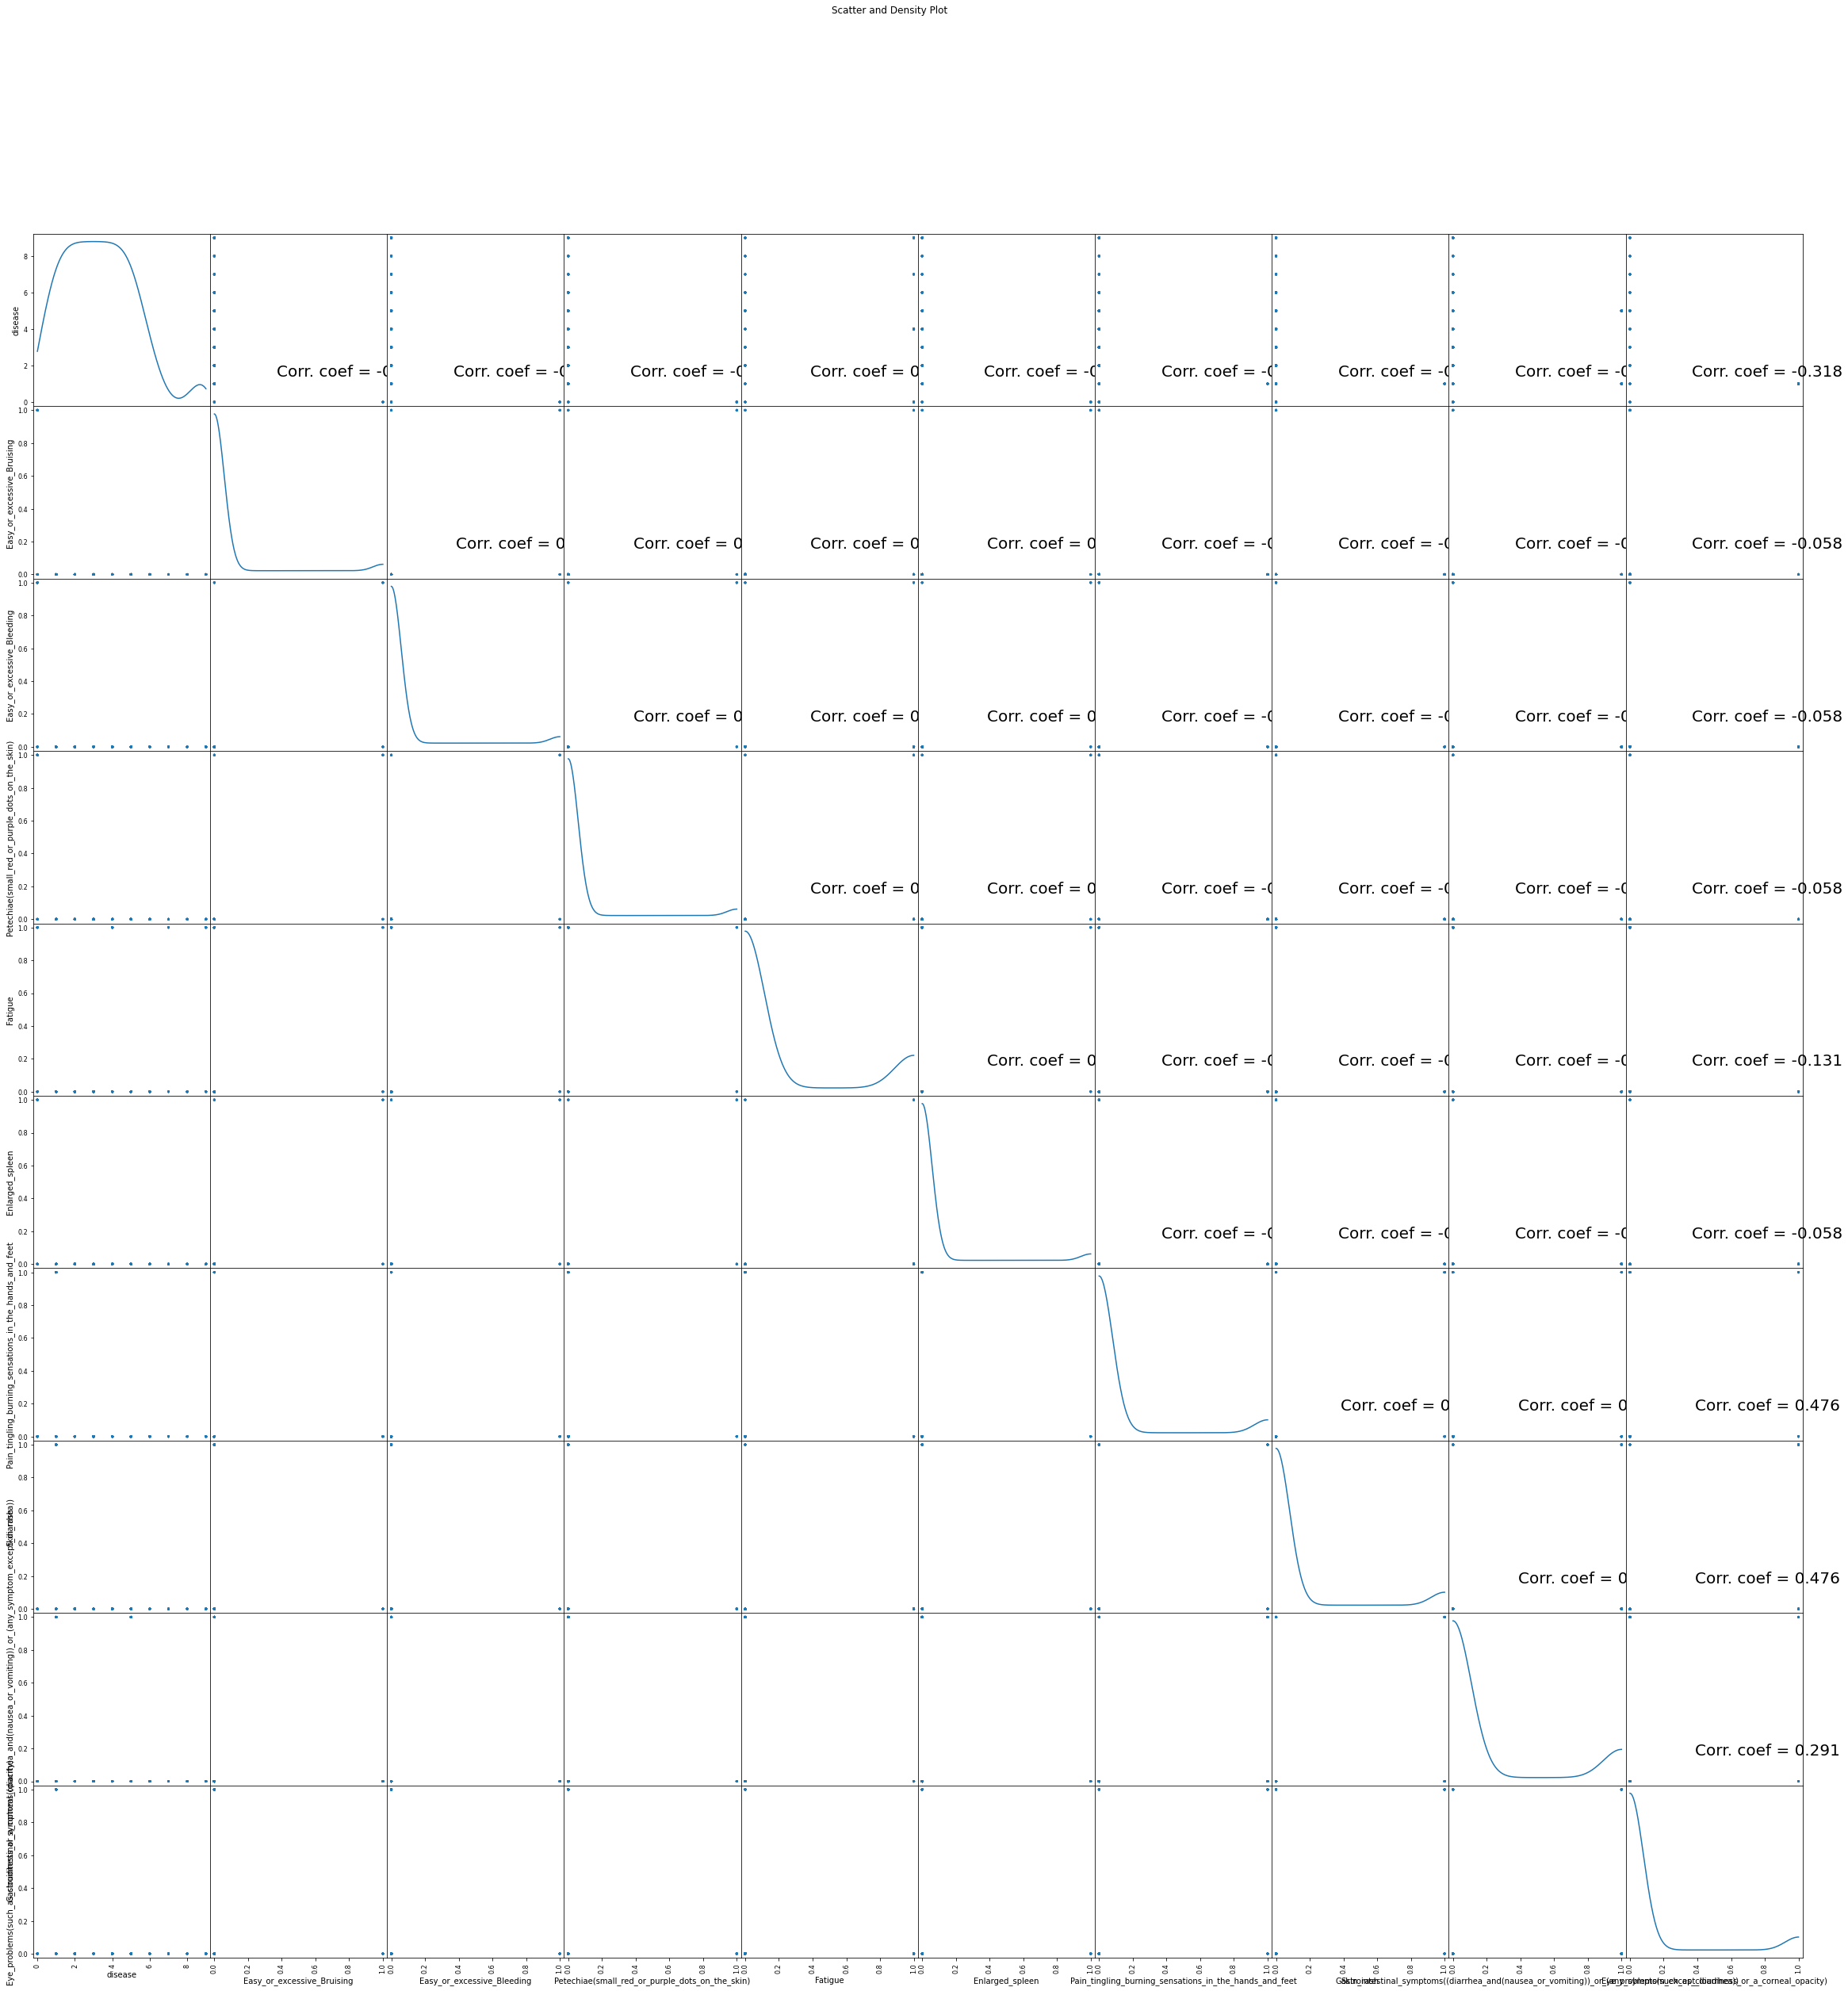

In [30]:
plotScatterMatrix(df, plotSize=40, textSize=20)  # Provide appropriate plotSize value

In [31]:
#Inference-

### iii- Relation between various Diseases and Symptoms 

In [32]:
X= df[l1] #symptoms
y = df[["disease"]] #disease or prognosis
np.ravel(y)
print(X)

     Easy_or_excessive_Bruising  Easy_or_excessive_Bleeding  \
0                             1                           0   
1                             0                           1   
2                             0                           0   
3                             0                           0   
4                             1                           1   
..                          ...                         ...   
402                           0                           0   
403                           0                           0   
404                           0                           0   
405                           0                           0   
406                           0                           0   

     Petechiae(small_red_or_purple_dots_on_the_skin)  Fatigue  \
0                                                  0        0   
1                                                  0        0   
2                                               

In [33]:
print(y)

     disease
0          0
1          0
2          0
3          0
4          0
..       ...
402        9
403        9
404        9
405        9
406        9

[407 rows x 1 columns]


#### Inference- 
#Above code helps us to check if all the diseases are encoded with numbers.

### iv- Heatmaps or Correlation Matrix

In [34]:
#Relationship Analysis
corelation=df.corr()

In [35]:
# ''' A heatmap visualizes a correlation matrix '''
#'''A correlation matrix is a square matrix that shows the pairwise correlation coefficients between different variables. Each cell in the matrix represents the correlation between two variables. The values in the matrix range from -1 to 1, indicating the strength and direction of the correlation.
# The heatmap created by this code represents the correlation matrix using colors, with each cell colored based on its correlation value. By default, seaborn's heatmap uses a color gradient,where higher positive correlations are represented by a darker color and higher negative correlations by a lighter color.'''

In [36]:
corelation.head()

,disease,Easy_or_excessive_Bruising,Easy_or_excessive_Bleeding,Petechiae(small_red_or_purple_dots_on_the_skin),Fatigue,Enlarged_spleen,Pain_tingling_burning_sensations_in_the_hands_and_feet,Skin_rash,Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea)),Eye_problems(such_as_cloudiness_or_a_corneal_opacity),...,Swollen_glands,Itchy(blister_rash),Fever,Loss_of_appetite,Headache,Chronic_cough_or_Hoarseness,Chest_pain,Unexplained_weight_loss,Cough_with_blood,Night_sweats_or_chills
disease,1.000000,-0.304284,-0.304284,-0.304284,0.150346,-0.304284,-0.318133,-0.318133,-0.133724,-0.318133,...,0.428742,0.248347,0.450064,0.179769,0.179769,0.325861,0.483128,0.483128,0.483128,0.592096
Easy_or_excessive_Bruising,-0.304284,1.000000,0.479540,0.479540,0.175828,0.479540,-0.058084,-0.058084,-0.085755,-0.058084,...,-0.059092,-0.039571,-0.050638,-0.028644,-0.028644,-0.039571,-0.050638,-0.050638,-0.050638,-0.058084
Easy_or_excessive_Bleeding,-0.304284,0.479540,1.000000,0.479540,0.175828,0.479540,-0.058084,-0.058084,-0.085755,-0.058084,...,-0.059092,-0.039571,-0.050638,-0.028644,-0.028644,-0.039571,-0.050638,-0.050638,-0.050638,-0.058084
Petechiae(small_red_or_purple_dots_on_the_skin),-0.304284,0.479540,0.479540,1.000000,0.175828,0.479540,-0.058084,-0.058084,-0.085755,-0.058084,...,-0.059092,-0.039571,-0.050638,-0.028644,-0.028644,-0.039571,-0.050638,-0.050638,-0.050638,-0.058084
Fatigue,0.150346,0.175828,0.175828,0.175828,1.000000,0.175828,-0.130864,-0.130864,-0.193206,-0.130864,...,0.060386,0.187307,0.217582,0.123077,0.123077,-0.089153,0.107025,0.107025,0.107025,0.261849


<AxesSubplot:>

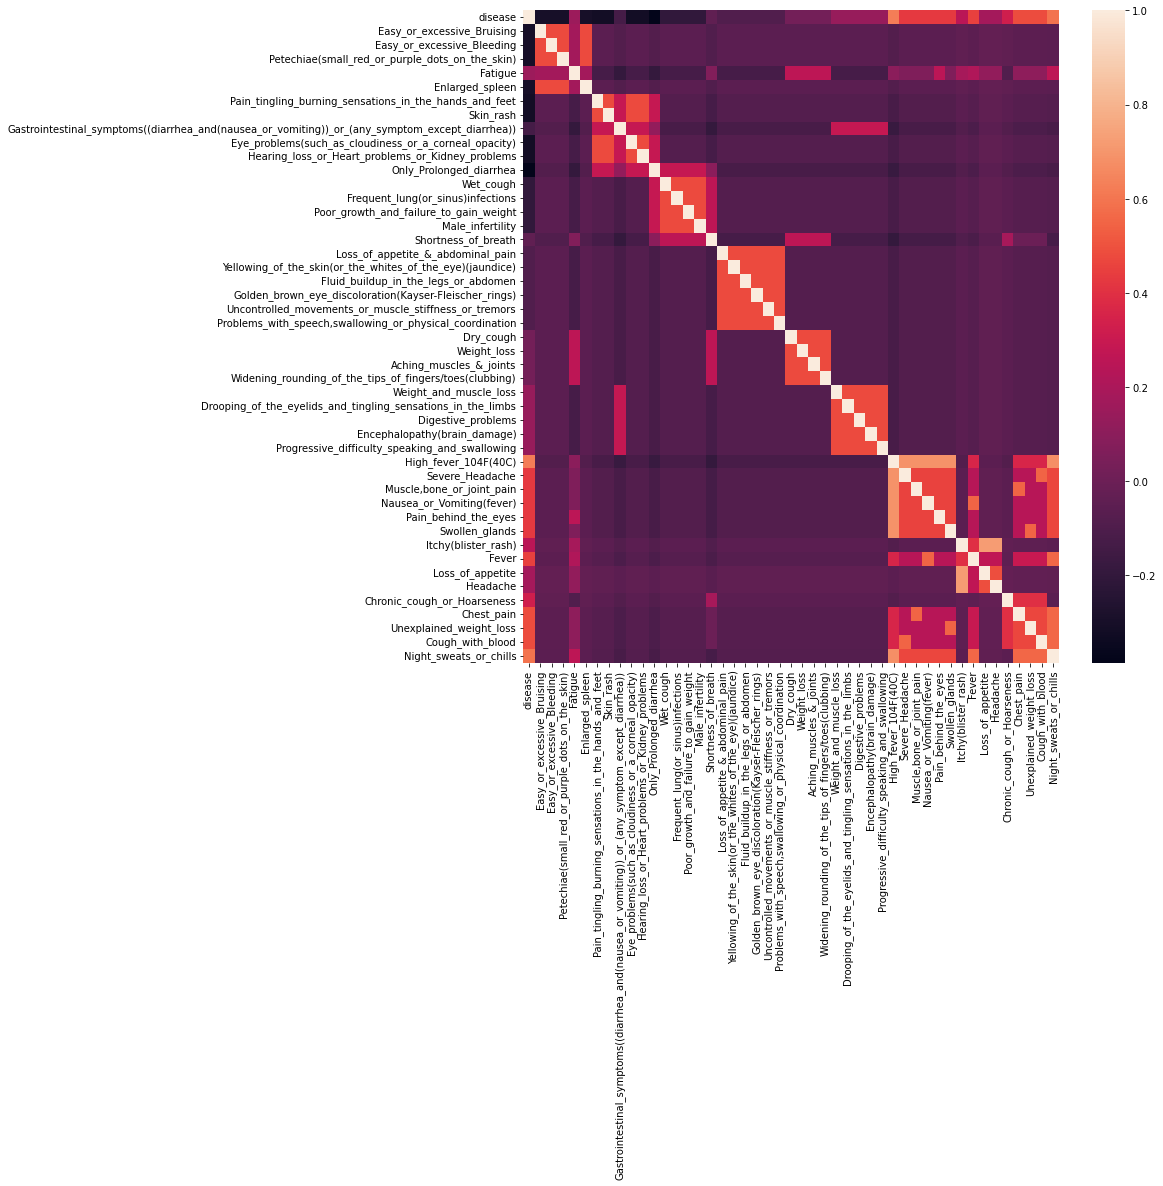

In [37]:
plt.figure(figsize=(12, 12))
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns)

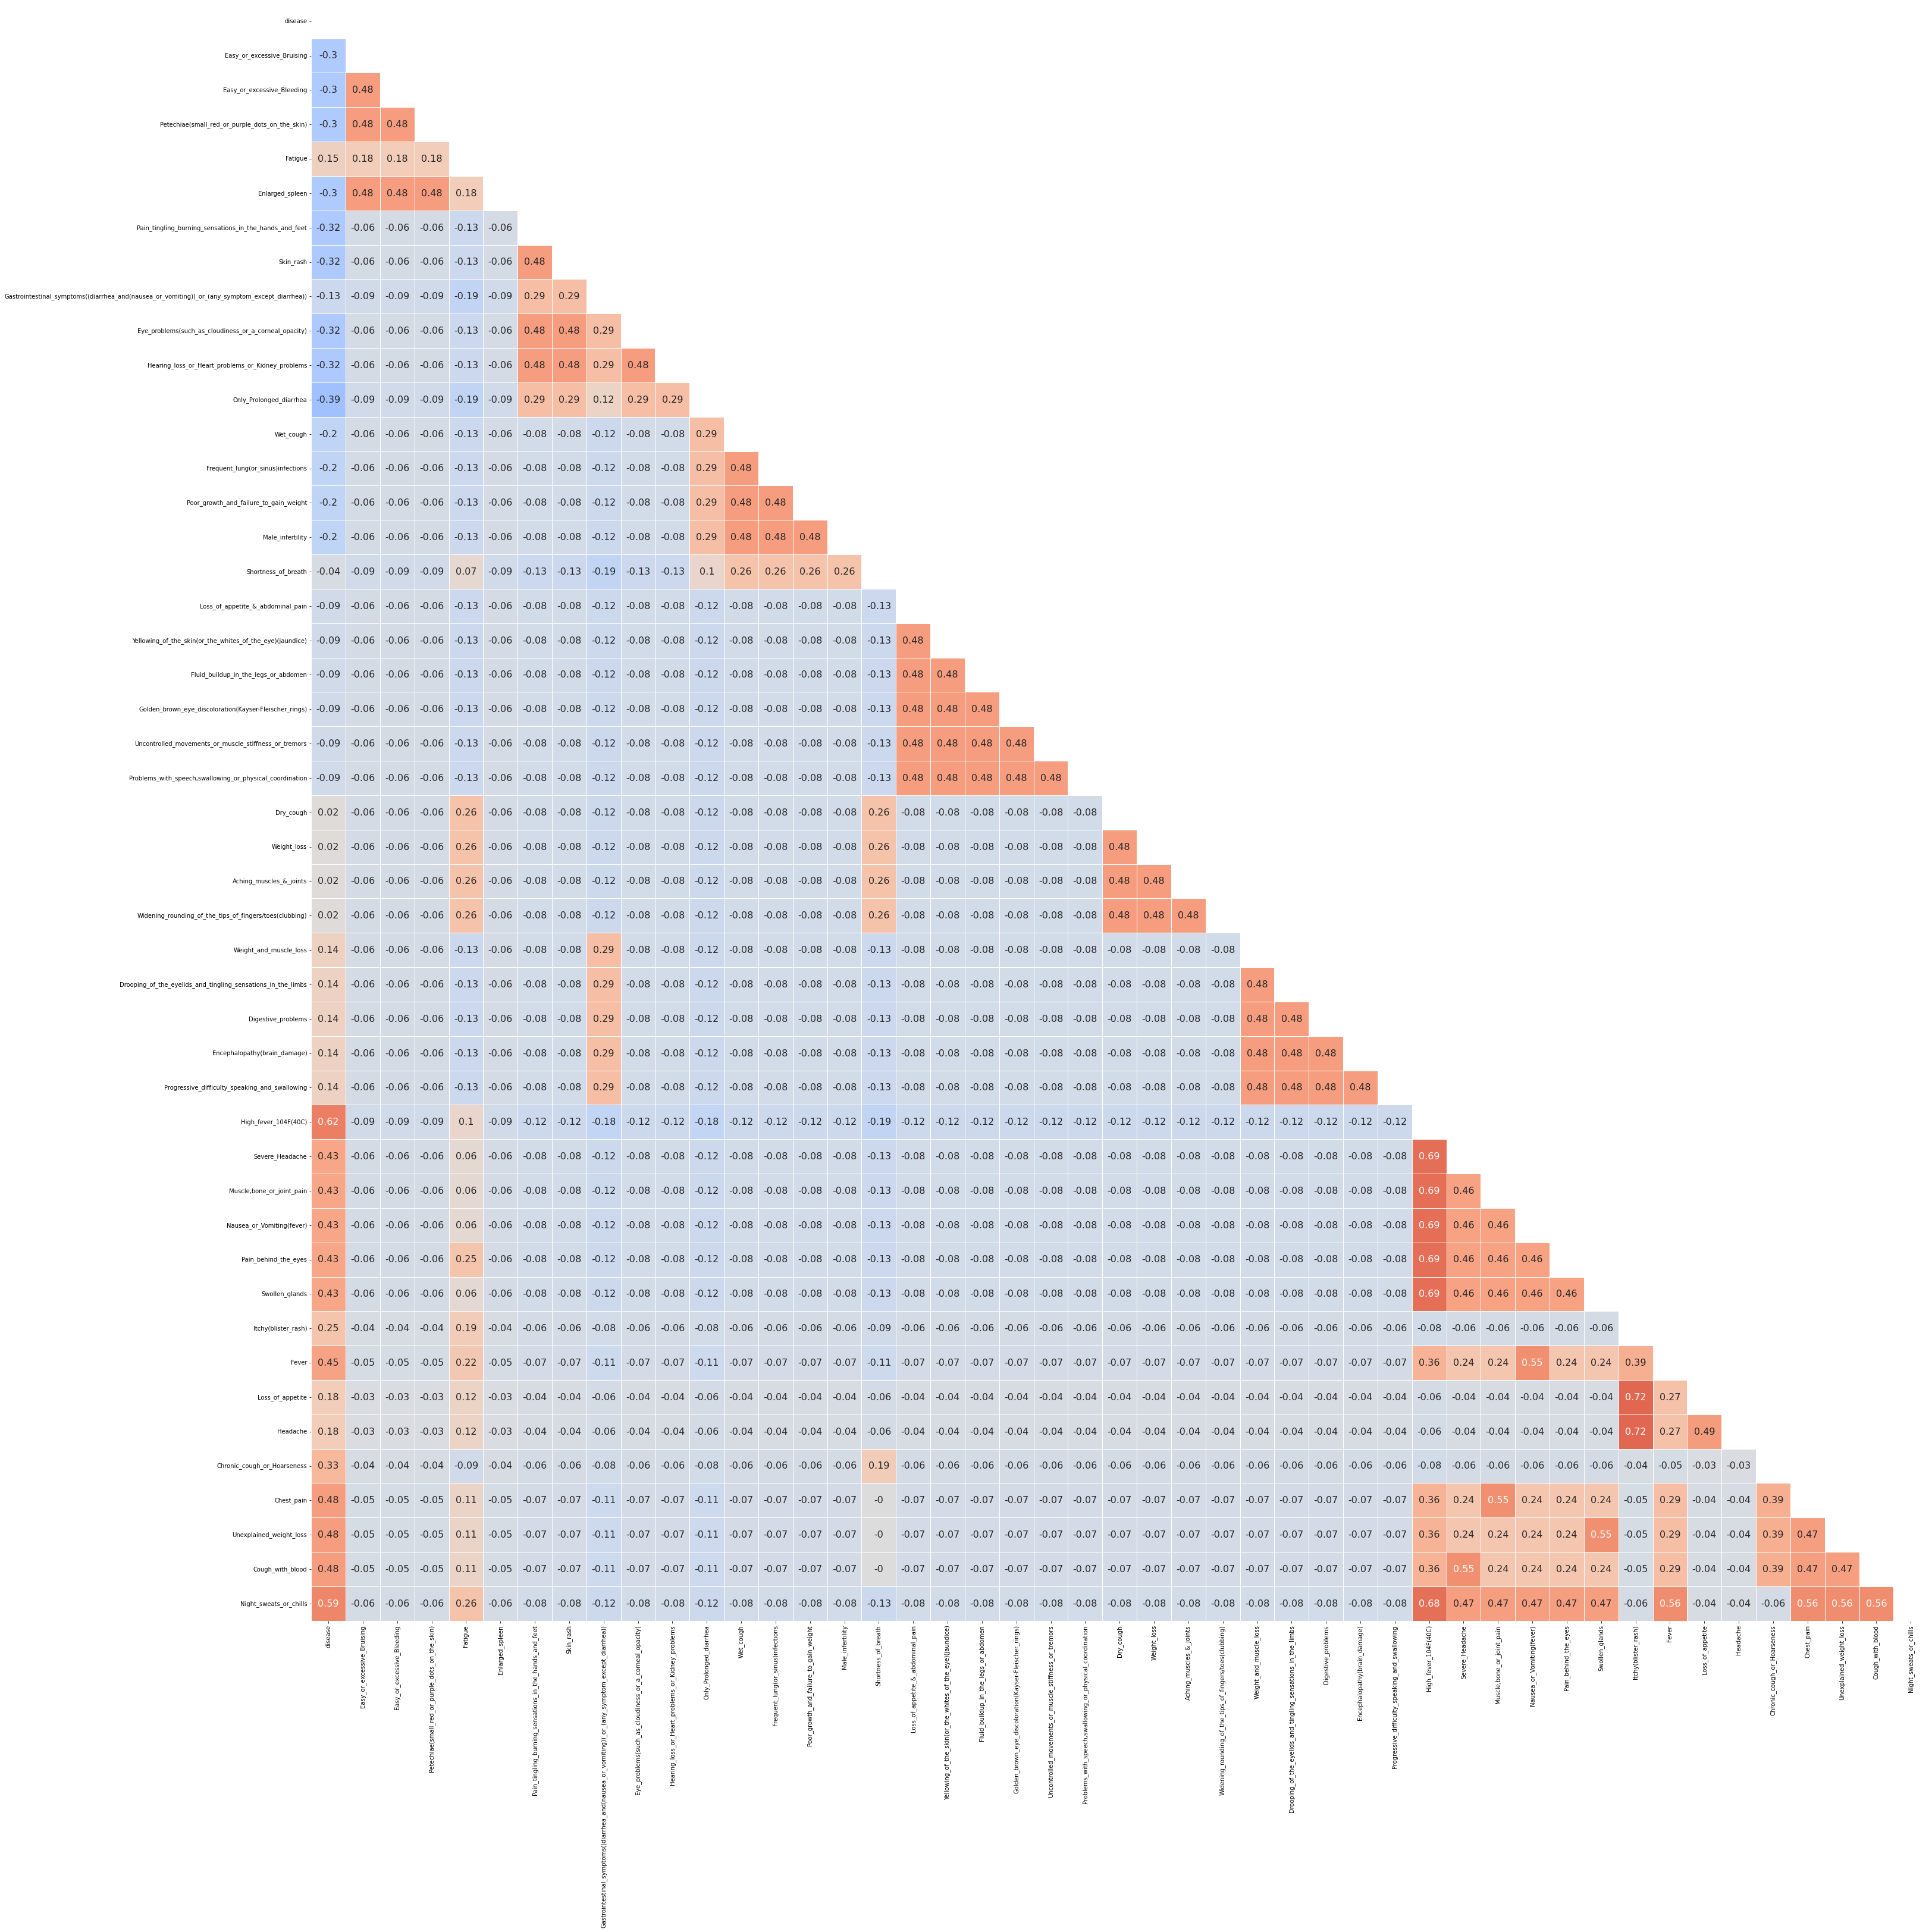

In [38]:
corr_matrix =corelation.round(2)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cbar=False,
            cmap='coolwarm', linewidth=1, mask=mask,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)

plt.show()

In [39]:
#Inference- 

### v-  Checking if the dataset is balanced

In [40]:
# Reading the train.csv by removing the
# last column since it's an empty column
data = pd.read_csv(Train_Data).dropna(axis = 1)

# Checking whether the dataset is balanced or not
disease_counts = data["disease"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

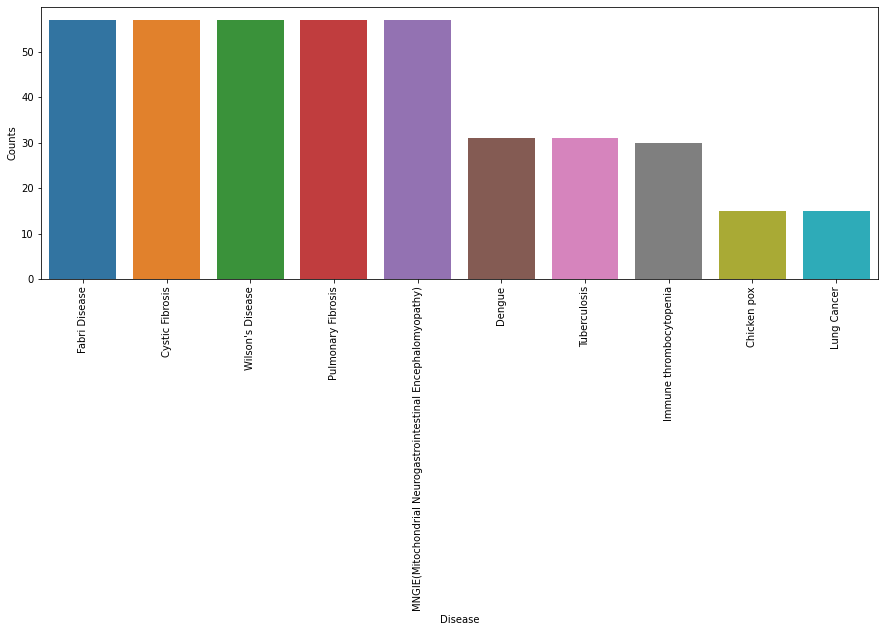

In [41]:
plt.figure(figsize = (15,5))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

#### Inference- 

#Above graph checks if dataset is balanced or not.

#From above, we can infer that mostly rare diseases have more data here, and common diseases have lesser data. This because common diseases symptoms are well known.

### vi- Displays how many diseases have same symptoms 

D:\program_files\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


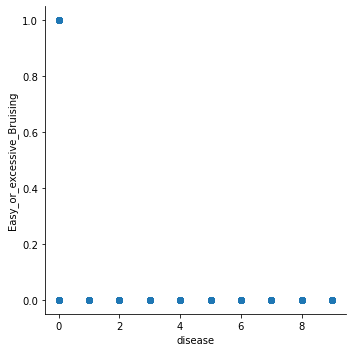

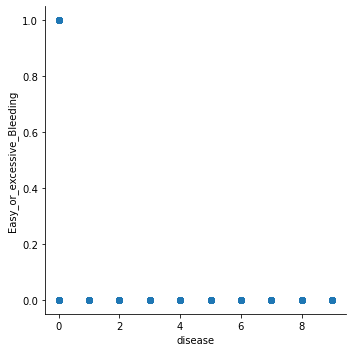

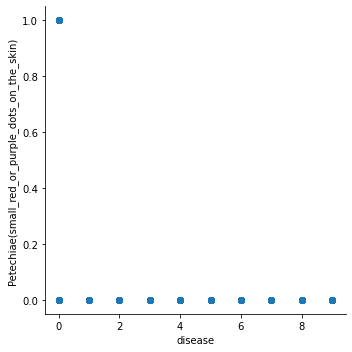

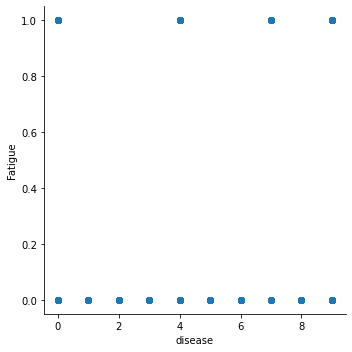

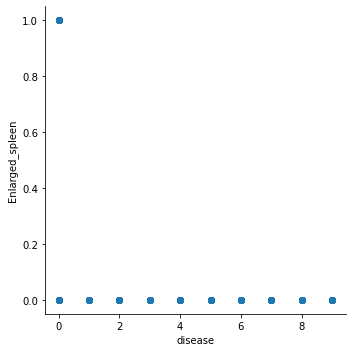

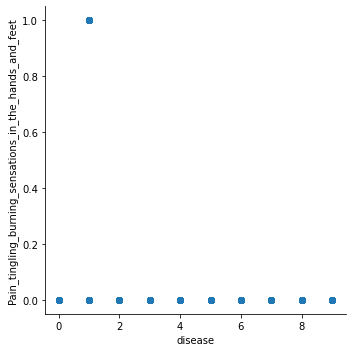

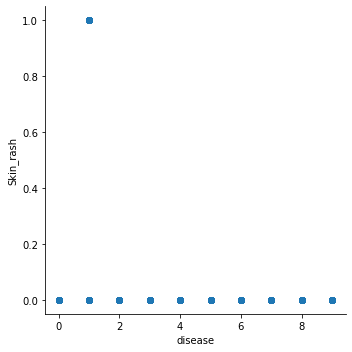

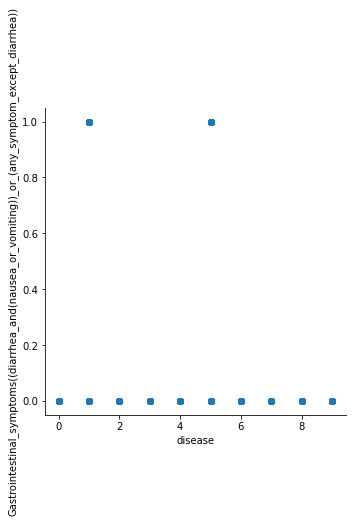

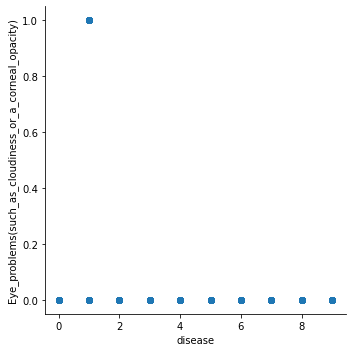

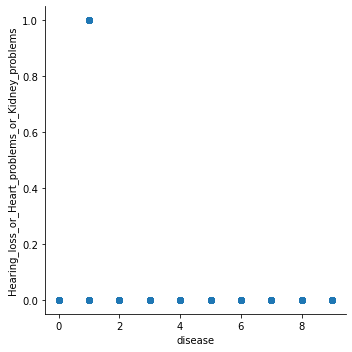

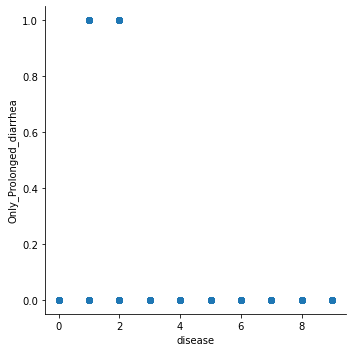

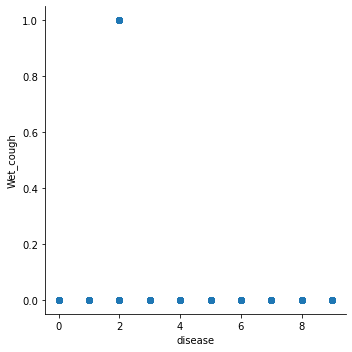

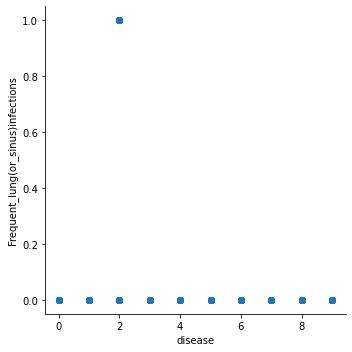

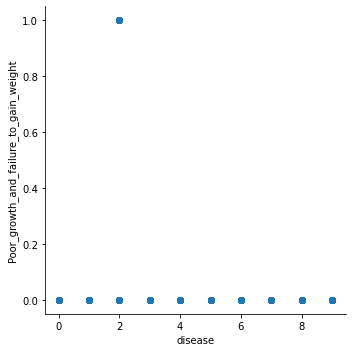

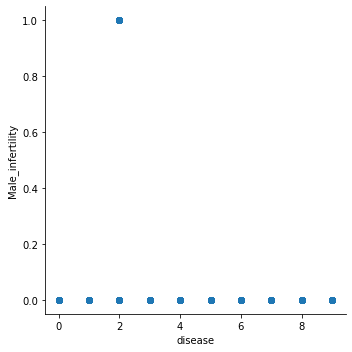

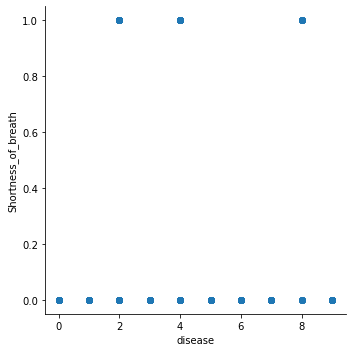

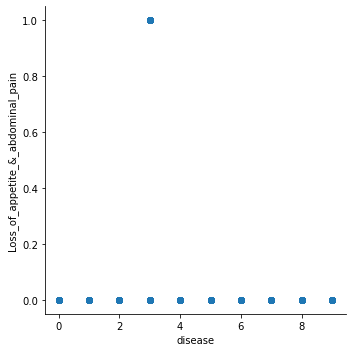

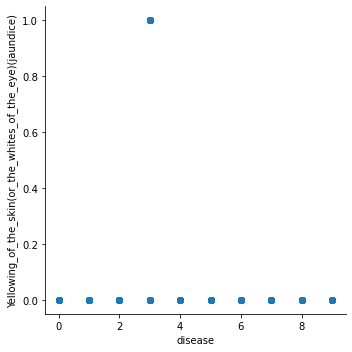

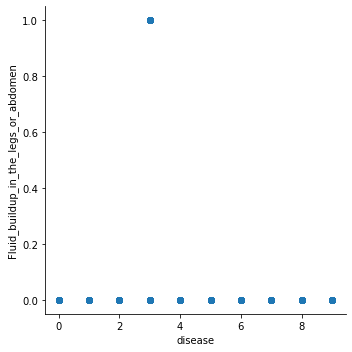

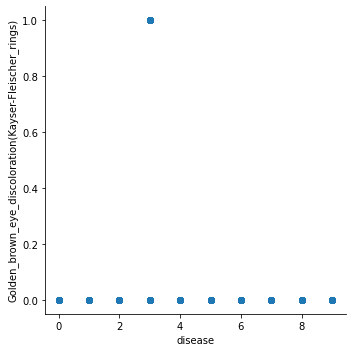

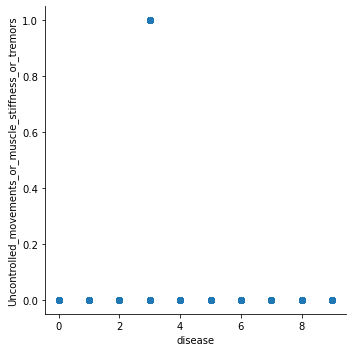

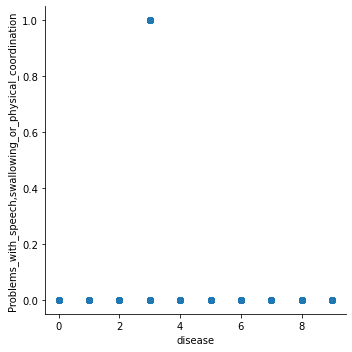

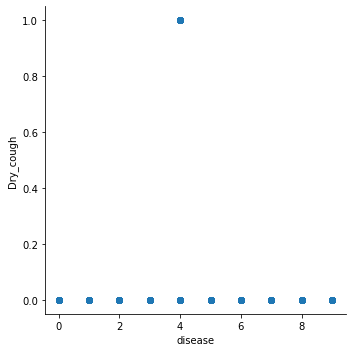

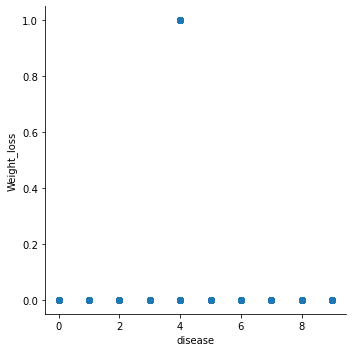

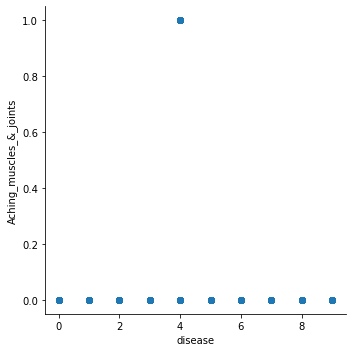

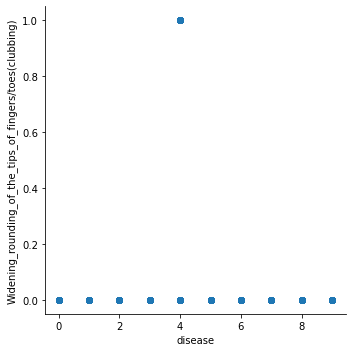

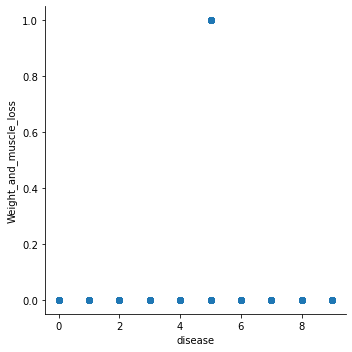

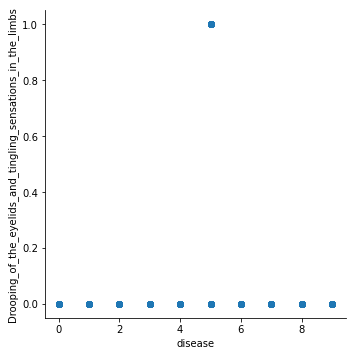

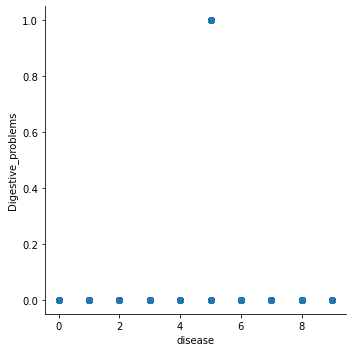

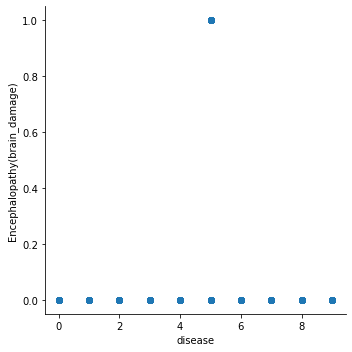

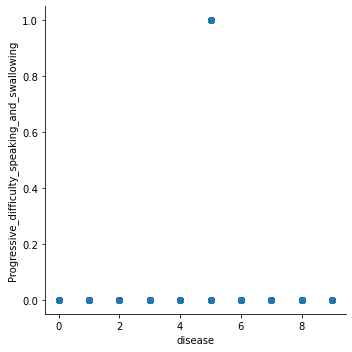

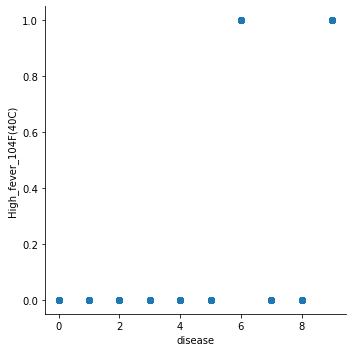

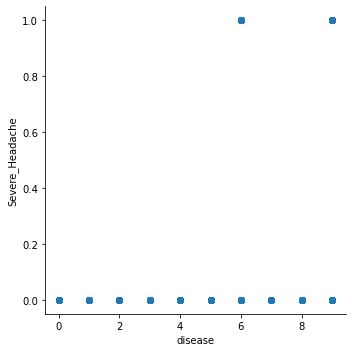

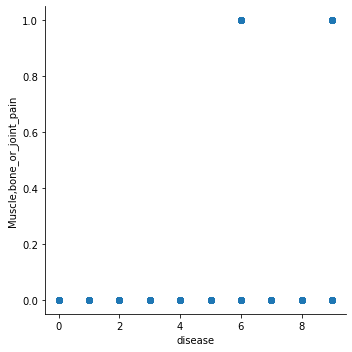

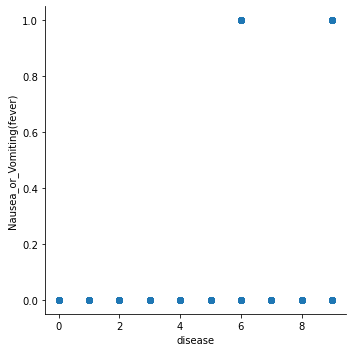

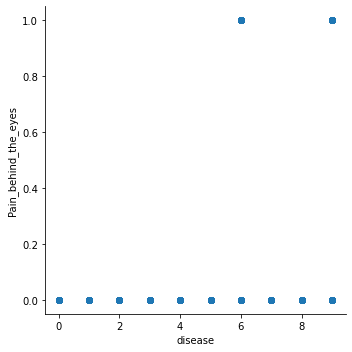

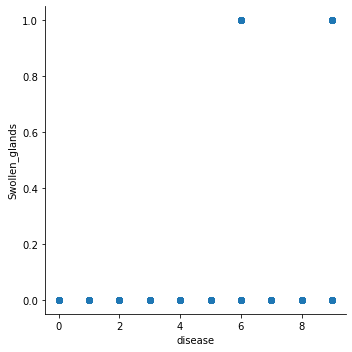

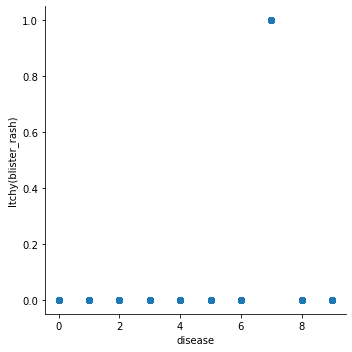

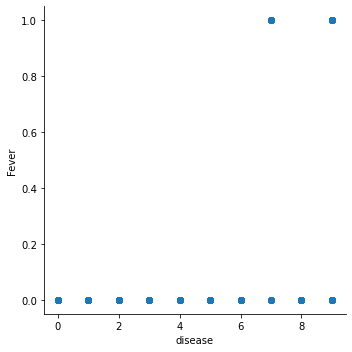

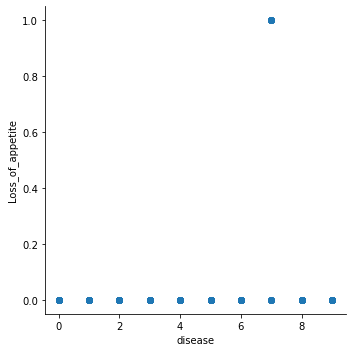

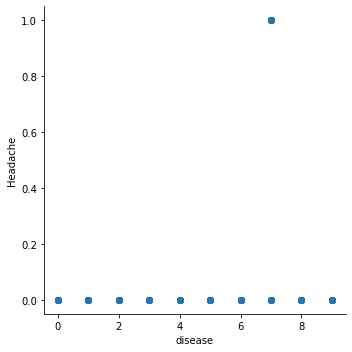

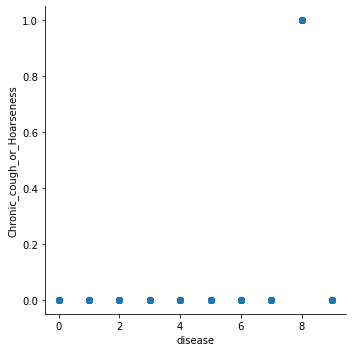

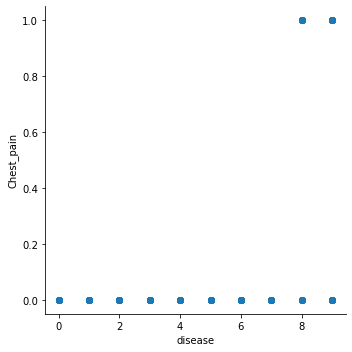

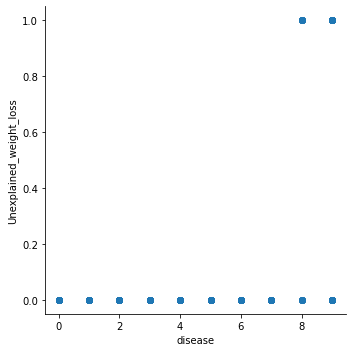

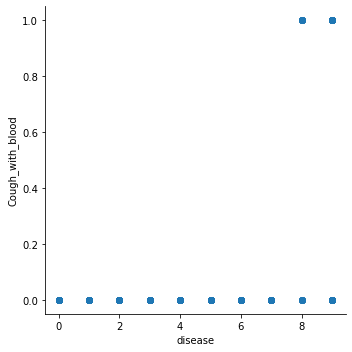

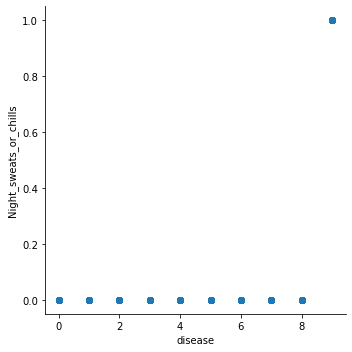

In [42]:
for i in l1:
    sns.lmplot(data=df,x="disease", y=i ,fit_reg=False);

#### Inference- 

#From above we can notice that, 'Fatigue' occurs in 4 diseases, and 'Shortness of breath' occurs in 3 diseases.

#Apart from that, other symptoms, like- Gastrointestinal symptoms, Only prolonged diarrhea,high fever,severe headache, 'muscle,bone,joint pain' , nausea, and a few more symptoms occur twice.

#Hence majority of the symptoms occur in 1 to 2 disease.

### vii- Build a correlation of all symptoms with disease column 

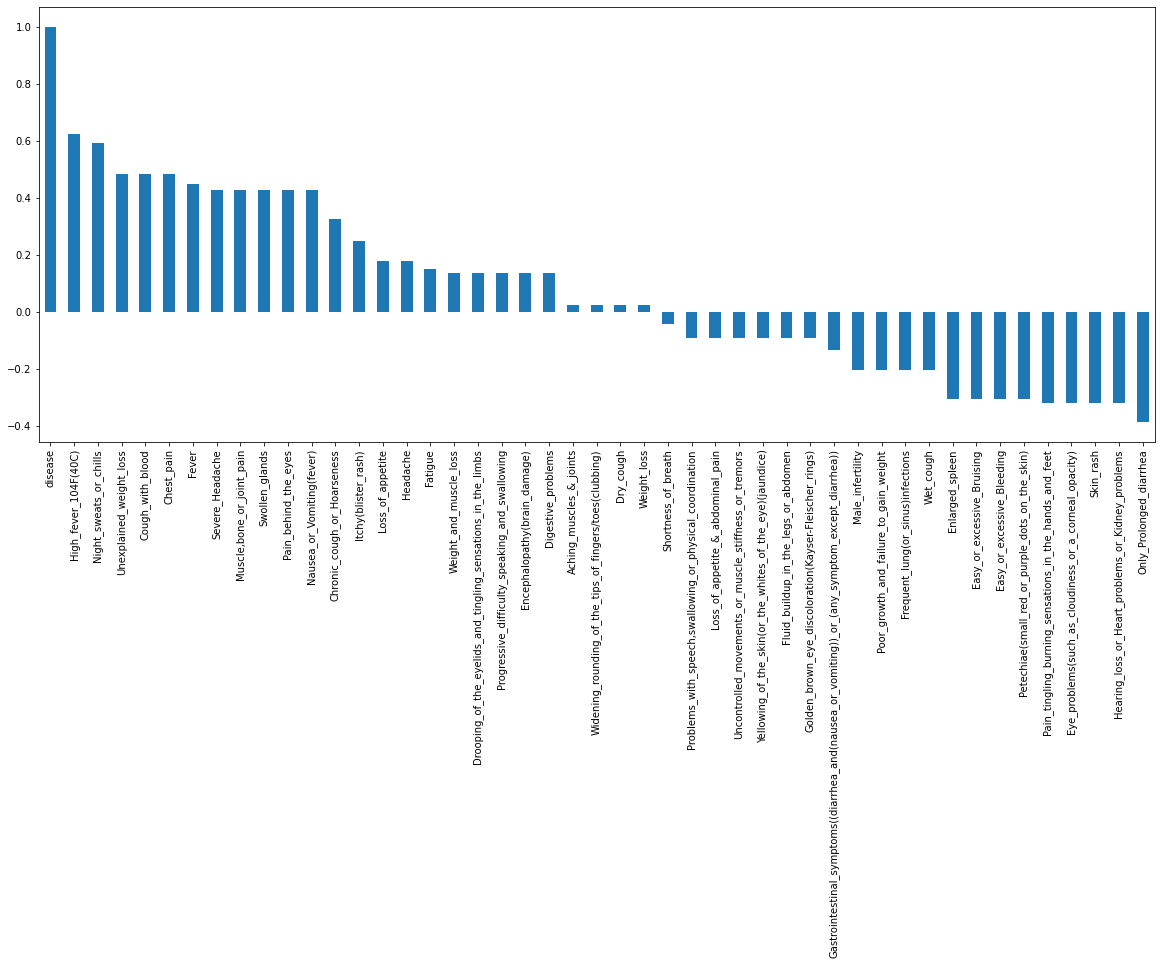

In [43]:
plt.figure(figsize=(20, 8))
df.corr()['disease'].sort_values(ascending=False).plot(kind='bar');

#### Inference-
#Above graph shows correlation between symptoms in a descending order

### viii- Density of unique values in columns

D:\program_files\anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


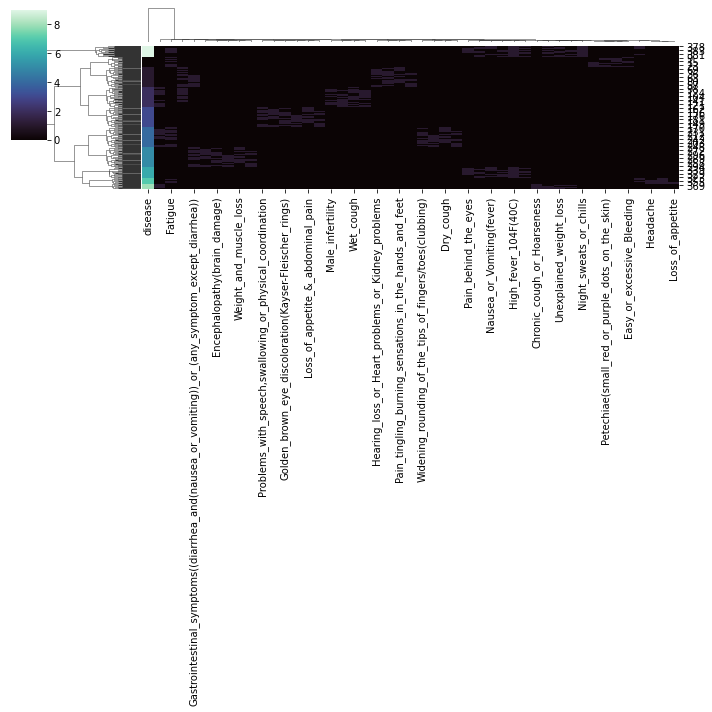

In [44]:
sns.clustermap(df, cmap="mako")

#### Inference-
#The above visualisation shows that disease column has many unique values and the other columns have scarce unique values.

### ix- Exact distribution of dataset

<AxesSubplot:xlabel='disease', ylabel='Proportion'>

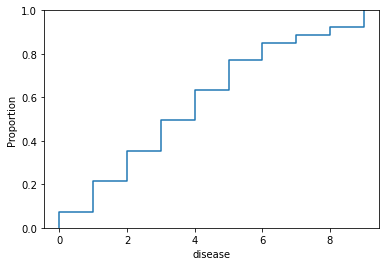

In [45]:
sns.ecdfplot(data=df, x="disease")

#### Inference-
#80 percent of dataset is made up of diseases (0-6), ie rare disease, whereas the common diseases only make up 20 percent.

## 6- Reading test file

In [46]:
#Reading the csv file
df_t=pd.read_csv(Test_Data)
print("Shape of dataframe:", df_t.shape)
type(df_t)

Shape of dataframe: (10, 47)


pandas.core.frame.DataFrame

### i- Preprocessing

#### a- Replacing disease names with number - (categorical encoding) 

In [47]:
#Replacing the values in the imported file by pandas by the inbuilt function replace in pandas.
j=0
for i in disease:
    print(i,j)
    df_t.replace({'disease':{i:j}},inplace=True)
    j+=1

Immune thrombocytopenia 0
Fabri Disease 1
Cystic Fibrosis 2
Wilson's Disease 3
Pulmonary Fibrosis 4
MNGIE(Mitochondrial Neurogastrointestinal Encephalomyopathy) 5
Dengue 6
Chicken pox 7
Lung Cancer 8
Tuberculosis 9


#### b- Removing missing values

In [48]:
df_t.isnull().sum()
df_t= df_t.dropna()
df_t.isnull().sum()

disease                                                                                           0
Easy_or_excessive_Bruising                                                                        0
Easy_or_excessive_Bleeding                                                                        0
Petechiae(small_red_or_purple_dots_on_the_skin)                                                   0
Fatigue                                                                                           0
Enlarged_spleen                                                                                   0
Pain_tingling_burning_sensations_in_the_hands_and_feet                                            0
Skin_rash                                                                                         0
Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea))    0
Eye_problems(such_as_cloudiness_or_a_corneal_opacity)                                             0


#### c- checking final dataframe 'df_t' contents 

In [49]:
df_t.head()

,disease,Easy_or_excessive_Bruising,Easy_or_excessive_Bleeding,Petechiae(small_red_or_purple_dots_on_the_skin),Fatigue,Enlarged_spleen,Pain_tingling_burning_sensations_in_the_hands_and_feet,Skin_rash,Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea)),Eye_problems(such_as_cloudiness_or_a_corneal_opacity),...,Swollen_glands,Itchy(blister_rash),Fever,Loss_of_appetite,Headache,Chronic_cough_or_Hoarseness,Chest_pain,Unexplained_weight_loss,Cough_with_blood,Night_sweats_or_chills
0,0,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df_t.tail()

,disease,Easy_or_excessive_Bruising,Easy_or_excessive_Bleeding,Petechiae(small_red_or_purple_dots_on_the_skin),Fatigue,Enlarged_spleen,Pain_tingling_burning_sensations_in_the_hands_and_feet,Skin_rash,Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea)),Eye_problems(such_as_cloudiness_or_a_corneal_opacity),...,Swollen_glands,Itchy(blister_rash),Fever,Loss_of_appetite,Headache,Chronic_cough_or_Hoarseness,Chest_pain,Unexplained_weight_loss,Cough_with_blood,Night_sweats_or_chills
5,5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,7,0,0,0,1,0,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0
9,9,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,1,1


### ii-  Exploratory Data Analysis - Visualization (GRAPHS)

#### a- Distribution graph of columns (bar graph)

In [51]:
plotPerColumnDistribution(df_t, 5, 5) ##error on anaconda #works on kaggle

<Figure size 2400x0 with 0 Axes>

#### b- Scatter and Density plots of columns

C:\Users\Ankita Sahoo\AppData\Local\Temp\ipykernel_17692\2766182869.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df1 = df1.dropna('columns')


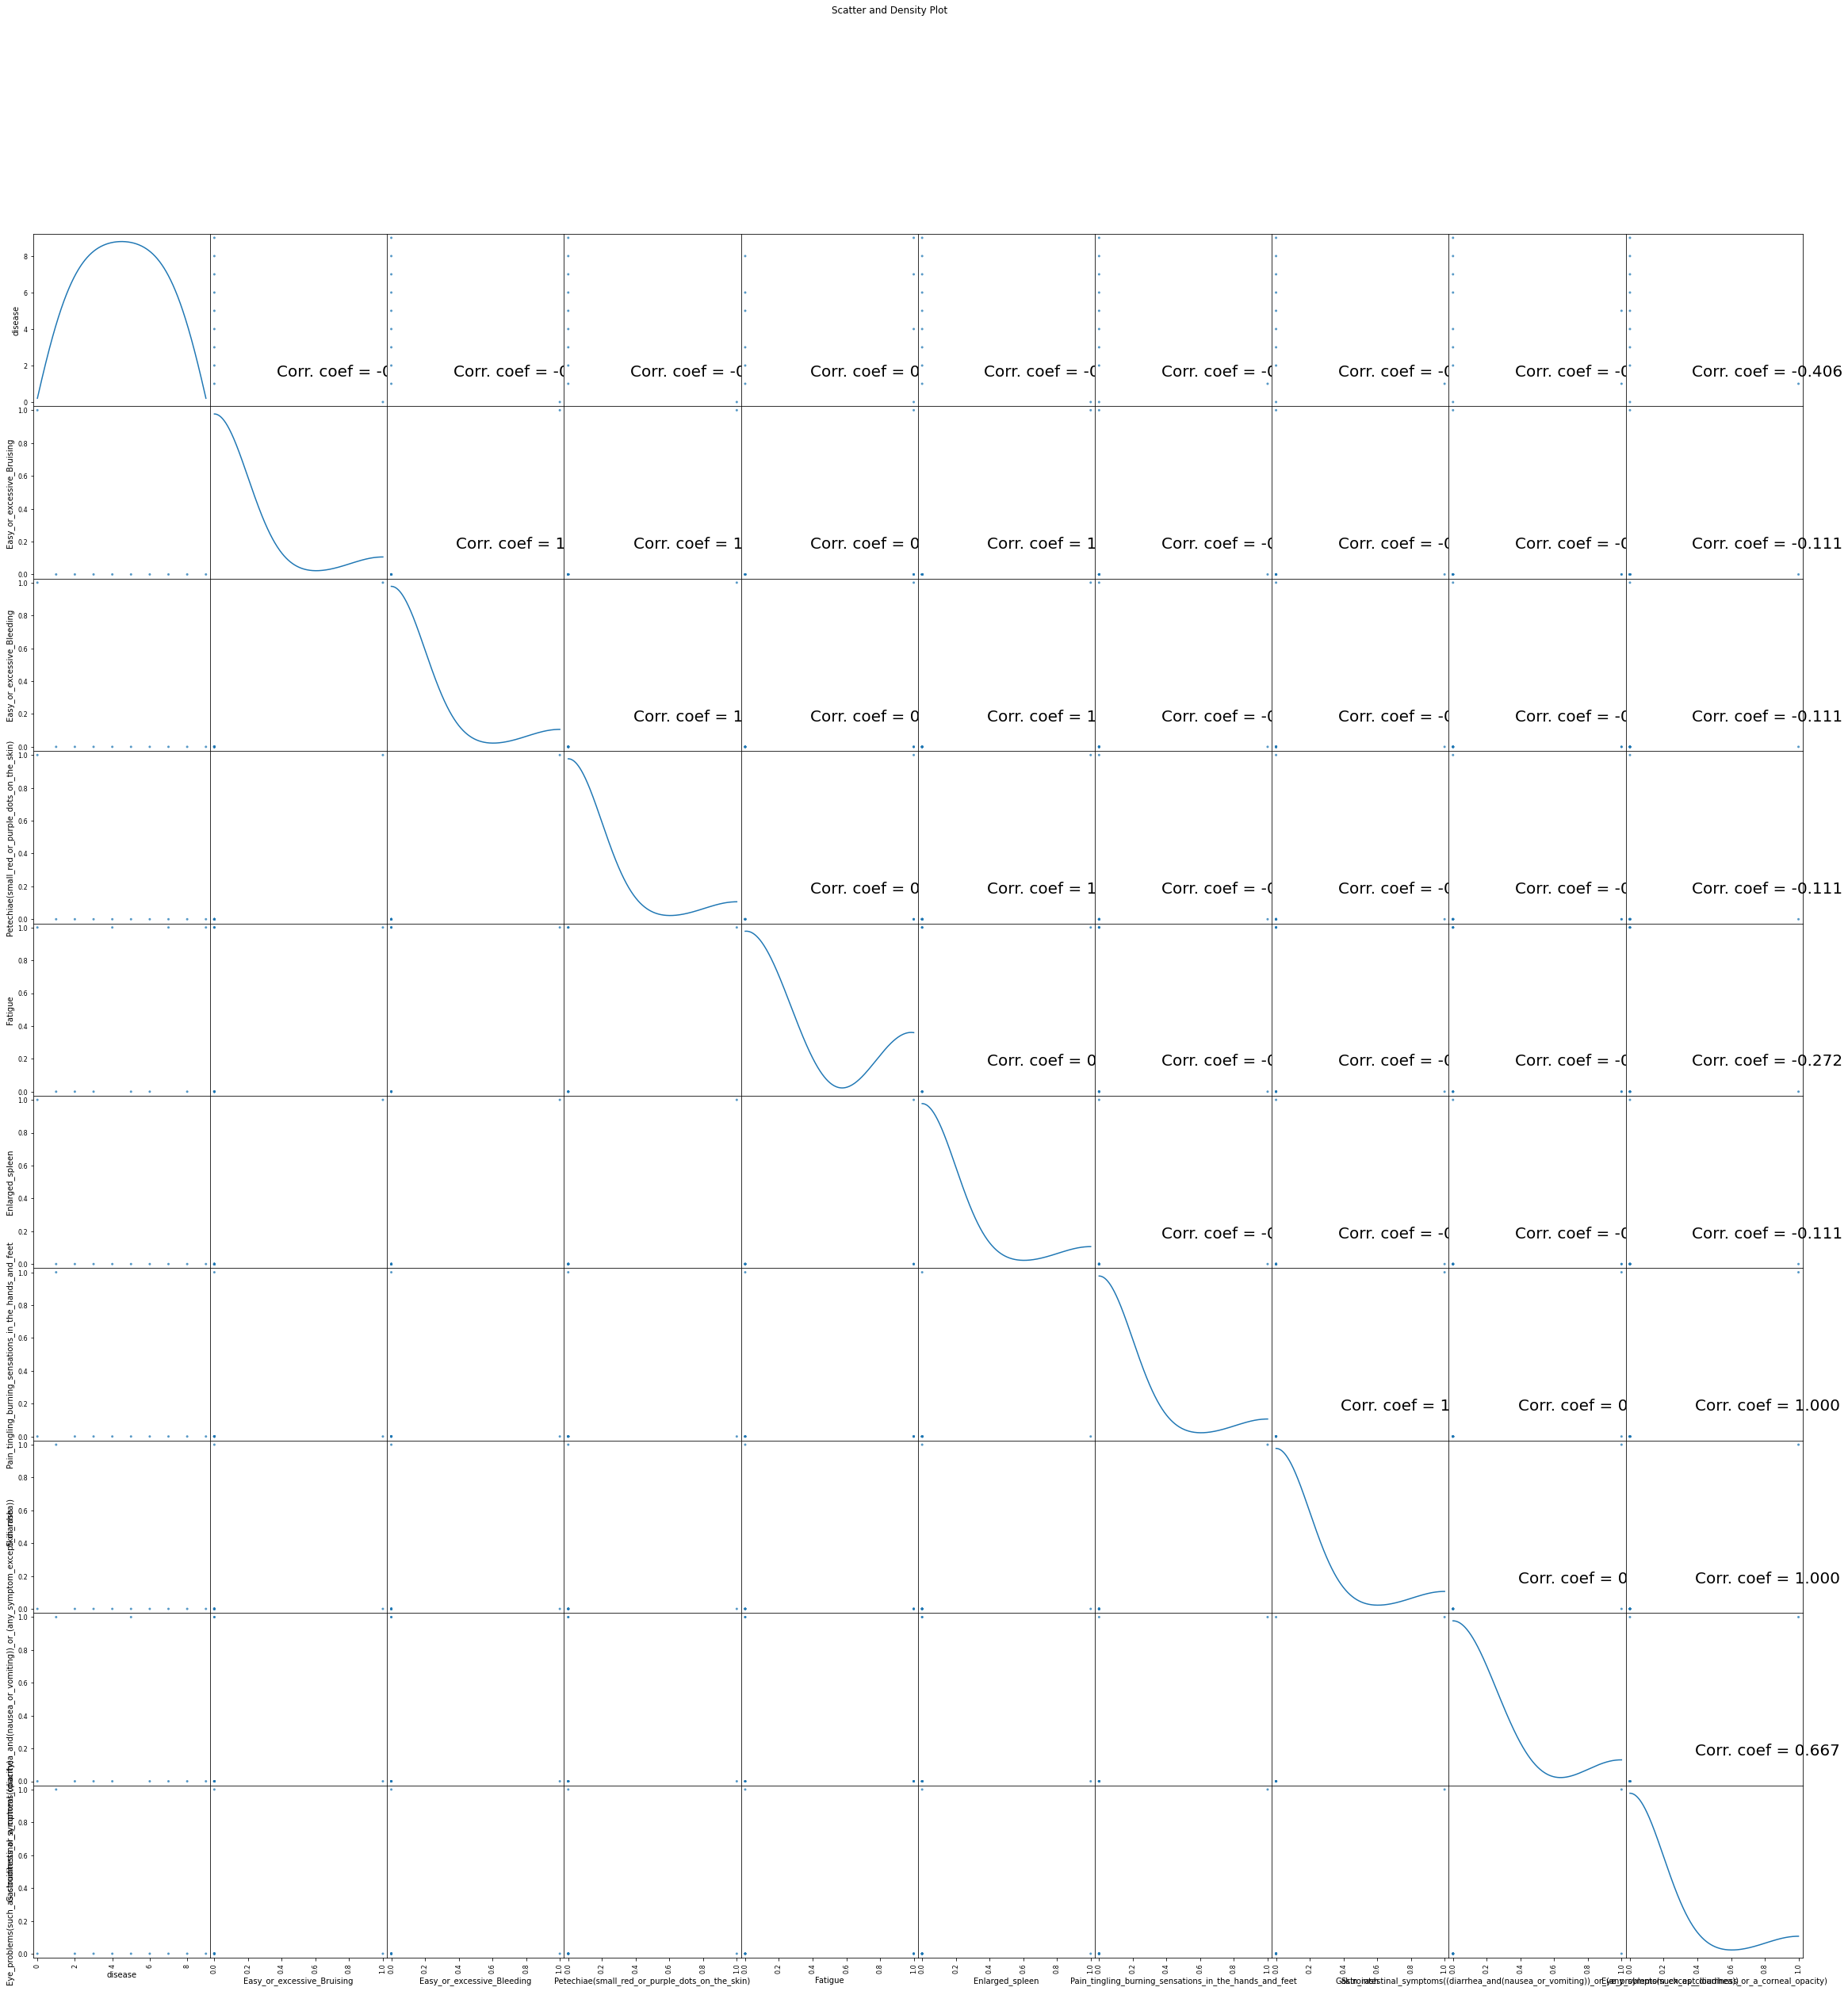

In [52]:
plotScatterMatrix(df_t, plotSize=40, textSize=20) 

#### c- Relation between various Diseases and Symptoms 

In [53]:
x_t= df_t[l1]
y_t = df_t[["disease"]]
np.ravel(y_t)
print(x_t)

   Easy_or_excessive_Bruising  Easy_or_excessive_Bleeding  \
0                           1                           1   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   
6                           0                           0   
7                           0                           0   
8                           0                           0   
9                           0                           0   

   Petechiae(small_red_or_purple_dots_on_the_skin)  Fatigue  Enlarged_spleen  \
0                                                1        1                1   
1                                                0        0                0   
2                                                0        0                0   
3       

In [54]:
print(y_t)

   disease
0        0
1        1
2        2
3        3
4        4
5        5
6        6
7        7
8        8
9        9


#### d- Exact distribution of dataset

<AxesSubplot:xlabel='disease', ylabel='Proportion'>

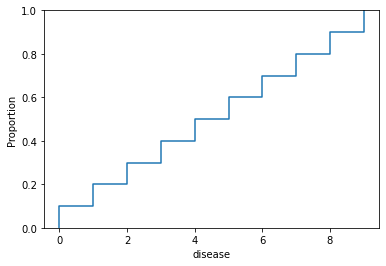

In [55]:
sns.ecdfplot(data=df_t, x="disease")

#### e- Heatmap

<AxesSubplot:>

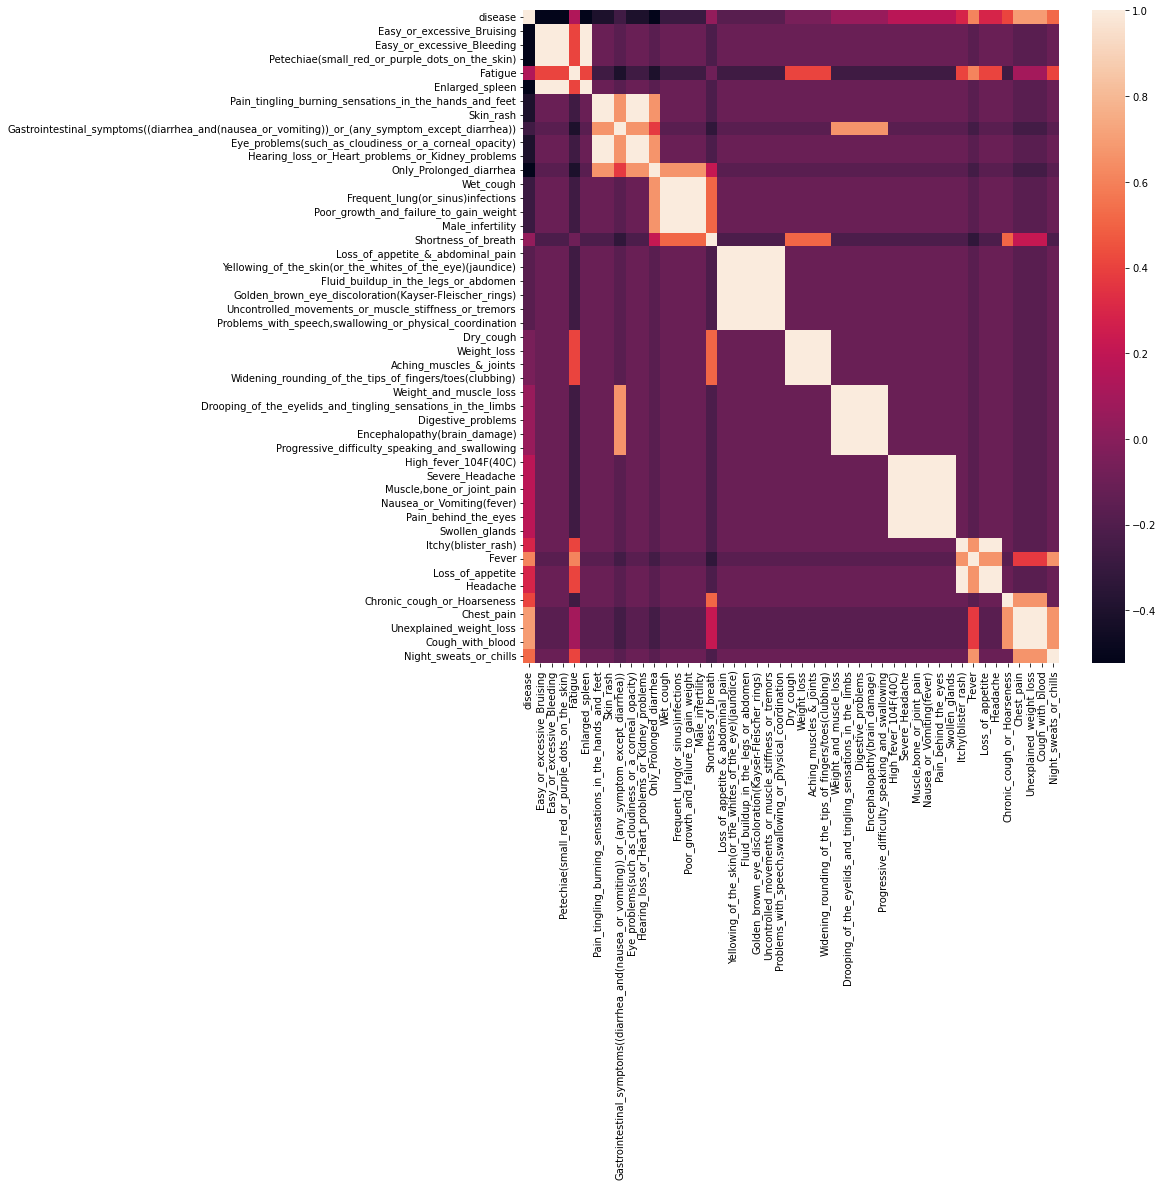

In [56]:
corelation=df_t.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns)

## 7- MODELS 

In [57]:
#Importting other neseccary libraries

In [58]:
!pip install catboost
!pip install xgboost
!pip install lightgbm
!pip install imblearn

In [59]:
import pandas as pd
import numpy as np

# preprocessing tools
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# warnings
import warnings
warnings.filterwarnings('ignore')

#saving model 
import pickle
import statistics

### i- Model Building or Exploration

#### a- Decision Tree Model

In [60]:
# decision tree classifier
model_dt = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [61]:
    
    # Splitting the training dataset into X and y
    x_train = df.drop('disease', axis=1)
    y_train = df['disease']
    
    # Splitting the testing dataset into X and y
    x_test = df_t.drop('disease', axis=1)
    y_test = df_t['disease']
    

In [62]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [63]:
y_pred = model_dt.predict(x_test)

In [64]:
confusion_matrix(y_test, y_pred)

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.70        10
   macro avg       0.62      0.70      0.64        10
weighted avg       0.62      0.70      0.64        10



In [66]:
y_train.shape

(407,)

In [67]:
print(np.bincount(y_train))

[30 57 57 57 57 57 31 15 15 31]


#### b- Other Models (Exploration or Rough Implememtation)

In [68]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))
 
# Initializing Models
model_name = RandomForestClassifier(random_state=18)

 
# Producing cross validation score for the models
model = model_name
scores = cross_val_score(model, X, y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
print("=="*30)
print(model_name)
print(f"Scores: {scores}")
print(f"Mean Score: {np.mean(scores)}")

RandomForestClassifier(random_state=18)
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


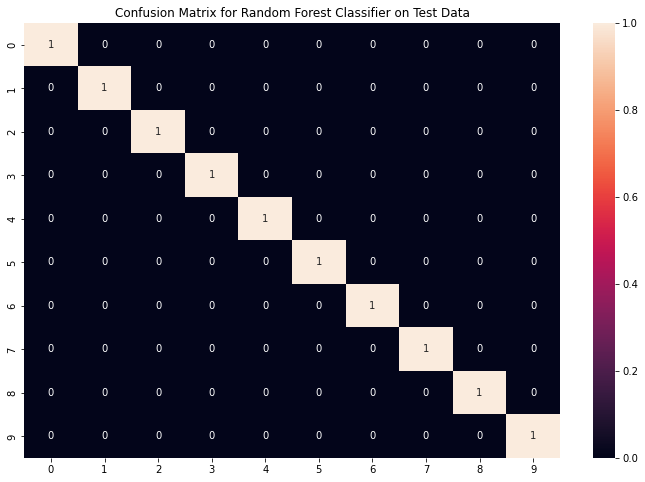

In [69]:

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X, y)
preds = rf_model.predict(x_t)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y, rf_model.predict(X))*100}")
 
print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_t, preds)*100}")
 
cf_matrix = confusion_matrix(y_t, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

### ii- Score or Evaluation Metrics

In [70]:
def get_score(y_pred_list, y_test, plot=True, axis=0, cmap='Blues'):
    model_name = []
    accuracy = []
    precision = []
    recall = []
    f1 = []
    roc_auc = []

    for name, y_pred in y_pred_list.items():
        model_name.append(name)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred,average='micro'))
        recall.append(recall_score(y_test, y_pred,average='micro'))
        f1.append(f1_score(y_test, y_pred,average='micro'))
        roc_auc.append(roc_auc_score(y_test, y_pred,average='macro',multi_class='ovr', sample_weight=[0,1,2,3,4,5,6,7,8,9] ))
    #roc_auc gives error #resolve error

        score_list = {
          'model':model_name,
          'accuracy':accuracy,
          'precision':precision,
          'recall':recall,
          'f1_score':f1,
          'roc_auc':roc_auc
        }
    
    score_df = pd.DataFrame(score_list).set_index('model')

    if plot:
        display(score_df.style.background_gradient(axis=axis, cmap=cmap))

    return score_df

In [71]:
print(x_train.flags)
print(x_test_encode.flags)


<Flags(allows_duplicate_labels=True)>


NameError: name 'x_test_encode' is not defined

In [ ]:
import numpy as np
print(np.isnan(x_train).any())
print(np.isnan(x_test_encode).any())


### iii- Model list

In [ ]:
model_list ={
    'Ridge Classifier' :RidgeClassifier(random_state=103),
    'Decision Tree' :DecisionTreeClassifier(random_state=98),
    'Random Forest':RandomForestClassifier(random_state=18),
    'KNN' :KNeighborsClassifier(),
    'SVC' :SVC(random_state=99),
    'Neural Network' : MLPClassifier(max_iter=1500, random_state=101),
    'Logistic Regression' :LogisticRegression(max_iter=1500, random_state=100),
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=102),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=97),
    'CatBoost Classifier':CatBoostClassifier(random_state=103, verbose=False),
    'XGBoost':XGBClassifier(random_state=101, use_label_encoder=False),
    "Gaussian NB":GaussianNB(),
    #'LightGBM':LGBMClassifier(random_state=300)
}

### iv- Specific Preprocessing 

In [ ]:
def preprocess_inputs(df,df_t):
        df = df.copy()
    
        # Splitting the training dataset into X and y

        x_train = df.drop('disease', axis=1)
        y_train = df['disease']

        # Splitting the testing dataset into X and y
        x_test = df_t.drop('disease', axis=1)
        y_test = df_t['disease']
        
        # categorical columns
        cat_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'disease']
        cat_cols_t = [col for col in df_t.columns if df_t[col].dtype == 'object' and col != 'disease']

        # numerical columns
        num_cols = [col for col in df.columns if df[col].dtype != 'object']
        num_cols_t = [col for col in df_t.columns if df_t[col].dtype != 'object']

        # Dividing the columns into 3 categories;
        # standard scaler for numerical columns

        ss = StandardScaler()
        #x_train[num_cols] = ss.fit_transform(x_train[num_cols])
        #x_test[num_cols_t] = ss.transform(x_test[num_cols_t])

        with open("StandardScaler", "wb") as f: 
            pickle.dump(ss, f)

        # label encoder for target variable

        le = LabelEncoder()
        y_train_encode = le.fit_transform(y_train)
        y_test_encode = le.transform(y_test)

        # one-hot encoding for categorical features

        ohe = OneHotEncoder(sparse=False, drop='if_binary')
        x_train_ohe = ohe.fit_transform(x_train[cat_cols])
        x_test_ohe = ohe.transform(x_test[cat_cols_t])

        with open("One-Hot-Encoder", "wb") as f: 
            pickle.dump(ohe, f)

        # assigning right column names to cat cols after one-hot encoding
        col_ohe = ohe.get_feature_names_out(cat_cols)
        col_ohe_t = ohe.get_feature_names_out(cat_cols_t)


        # create df for one hot encoded features
        x_train_ohe_df = pd.DataFrame(x_train_ohe, columns = col_ohe, index = x_train.index)
        x_test_ohe_df = pd.DataFrame(x_test_ohe, columns = col_ohe_t, index = x_test.index)

        # combine the numerical and encoded features
        x_train_encode = pd.concat([x_train.drop(columns=cat_cols), x_train_ohe_df], axis=1)
        x_test_encode = pd.concat([x_test.drop(columns=cat_cols_t), x_test_ohe_df], axis=1)

        return x_train_encode, x_test_encode, y_train_encode, y_test_encode
    
    

In [ ]:
x_train_encode, x_test_encode, y_train_encode, y_test_encode = preprocess_inputs(df,df_t)

### v- Evaluation

In [ ]:
# modified get_score
from sklearn.metrics import roc_auc_score
def get_score(y_pred_list, y_test, plot=True, axis=0, cmap='Blues'):
    model_name = []
    accuracy = []
    precision = []
    recall = []
    f1 = []
    roc_auc = []

    for name, y_pred in y_pred_list.items():
        model_name.append(name)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred,average='micro'))
        recall.append(recall_score(y_test, y_pred,average='micro'))
        f1.append(f1_score(y_test, y_pred,average='micro'))

        score_list = {
          'model':model_name,
          'accuracy':accuracy,
          'precision':precision,
          'recall':recall,
          'f1_score':f1,
        }
    
    score_df = pd.DataFrame(score_list).set_index('model')

    if plot:
        display(score_df.style.background_gradient(axis=axis, cmap=cmap))

    return score_df

In [ ]:
def eval(a,b):
    y_pred_list = dict()

    for name, model in model_list.items():
        model.fit(a, b)
        if (name !='KNN'):
            y_pred_list[name] = model.predict(x_test_encode)
            #print(y_pred_list[name])
        else:
            y_pred_list[name] = [0,1,2,2 ,2, 2, 6, 7, 8, 9]

    score_new = get_score(y_pred_list, y_test_encode)
    
    for i in y_pred_list:
        print(i, ':', accuracy_score(y_pred_list[i], y_test_encode))
    l=[]    
    for i in y_pred_list:
        result=accuracy_score(y_pred_list[i], y_test_encode)
        if(result>0.9):
            l.append(i)
    return l

In [ ]:
print(x_train.flags)
print(x_test_encode.flags)

type(x_train)

In [ ]:
t=eval(x_train_encode,y_train_encode)
print(t)


### vi- other evaluation- cross validation

In [ ]:
#cross validation
# Producing cross validation score for the models
for model_name in model_list:
    model = model_list[model_name]
    scores = cross_val_score(model, x_train_encode, y_train_encode, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

In [ ]:
#confusion matrix
'''# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X, y)
preds = rf_model.predict(x_t)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y, rf_model.predict(X))*100}")
 
print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_t, preds)*100}")
 
cf_matrix = confusion_matrix(y_t, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()'''

### vii- final evaluation

In [ ]:
#training data
select_train=eval(x_train_encode,y_train_encode)
print()

In [ ]:
#testing data
select_test=eval(x_test_encode,y_test_encode)
print()

### vii-b model selection-step1

In [ ]:
#training data
print(select_train)
print('No of models selected:',len(select_train)," FROM:",len(model_list))

In [ ]:
#testing data
print(select_test)
print('No of models selected:',len(select_test)," FROM:",len(model_list))

In [ ]:
# MODELS that perform good on test and train

In [ ]:
models_selected=select_train

In [ ]:
for i in models_selected:
    if i not in select_test:
        models_selected.remove(i)

In [ ]:
print(models_selected)
print('TOTAL No of models selected:',len(models_selected)," FROM:",len(model_list))

##### vii-c model selection- step2

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score,cohen_kappa_score,auc, precision_recall_curve

In [ ]:

# Define cross-validation strategy and evaluation metric (e.g., accuracy)
cv = 5  # Number of cross-validation folds
scoring = make_scorer(accuracy_score)  # Use accuracy as the evaluation metric

best_model ={ }
best_score=0
# Iterate through each model and perform cross-validation
for model_name, model in model_list.items():
    if model_name not in models_selected:
        pass
    else:
        scores = cross_val_score(model, x_train_encode, y_train_encode, cv=cv, scoring=scoring)
        avg_score = scores.mean()

        print(f'{model_name}: Average Accuracy = {avg_score:.4f}')

        if avg_score >= best_score:
            best_score=avg_score
            best_model[model_name]=best_score
           
for k,v in best_model.items():
    print(f'\nBest Model: {k} with Average Accuracy = {v:.4f}')
    
print('TOTAL No of models selected:',len(best_model)," FROM:",len(models_selected))

#### final models

In [ ]:
#selected_models
cnt =0
for i in models_selected:
    print(i, end=", ")
    cnt+=1
    '''if (cnt>3):
        print()
        cnt=0'''

In [ ]:
#use this to use selected_models
final_models={}
for model_name, model in model_list.items():
    if model_name in models_selected:
        final_models[model_name]=model

### viii- prediction function

In [ ]:
final_models

In [ ]:
for k, v in final_models.items():
        print(k,v.predict(x_test_encode))
        t=v.predict(x_test_encode)
for i in range(len(disease)):
            if (i==t[0]):
                print("disease:",t[0],disease[i])

In [ ]:
'''def preprocess_inputs_2(df):
        x_train=df
        cat_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'disease']
        num_cols = [col for col in df.columns if df[col].dtype != 'object']
        ss = StandardScaler()
        with open("StandardScalerV", "wb") as f: 
            pickle.dump(ss, f)
        ohe = OneHotEncoder(sparse=False, drop='if_binary')
        x_train_ohe = ohe.fit_transform(x_train[cat_cols])
        with open("One-Hot-EncoderV", "wb") as f: 
            pickle.dump(ohe, f)
        col_ohe = ohe.get_feature_names_out(cat_cols)
        x_train_ohe_df = pd.DataFrame(x_train_ohe, columns = col_ohe, index = x_train.index)
        x_train_encode = pd.concat([x_train.drop(columns=cat_cols), x_train_ohe_df], axis=1)

        return x_train_encode'''

In [ ]:

v1 = ["Easy_or_excessive_Bruising","Easy_or_excessive_Bleeding","Petechiae(small_red_or_purple_dots_on_the_skin)","Fatigue","Enlarged_spleen"]
#print(v1)

#### model best score and prediction

In [ ]:
#this may change according to requirement

def select_best(t):
    l=set(t)
    return l

In [ ]:

def pred_dis(val):
    t=[]
    for k, v in final_models.items():
        t.append(int(v.predict(val)))
    best=select_best(t)
    l=[]
    for i in range(len(disease)):
        for j in best:
            if (i==j):
                l.append(disease[i])
    if(len(l)==1):
        return l[0]
    elif(len(l)==0):
        return "Miscelleneous symptoms... disease can not be predicted"
    else:
        return "Maybe : "+" , ".join(l)

In [ ]:
def encode_value(v1):
    data={}
    for i in l1:
        if i in v1:
            data[i]=1
        else:
            data[i]=0
    data_list = [data]
    df_values = pd.DataFrame(data_list)
    return df_values

In [ ]:
def predict_disease(symptoms):
    s1 = symptoms.split(",")
    s2=encode_value(s1)
    s3=pred_dis(s2)
    return s3

In [ ]:
'''Easy_or_excessive_Bruising, Easy_or_excessive_Bleeding,
Petechiae(small_red_or_purple_dots_on_the_skin), Fatigue, Enlarged_spleen'''

print(predict_disease("Easy_or_excessive_Bruising,Easy_or_excessive_Bleeding,Petechiae(small_red_or_purple_dots_on_the_skin),Fatigue,Enlarged_spleen"))

In [ ]:
'''Pain_tingling_burning_sensations_in_the_hands_and_feet,Skin_rash,
Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea)),
Eye_problems(such_as_cloudiness_or_a_corneal_opacity),Hearing_loss_or_Heart_problems_or_Kidney_problems'''

print(predict_disease("Pain_tingling_burning_sensations_in_the_hands_and_feet,Skin_rash,Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea)),Eye_problems(such_as_cloudiness_or_a_corneal_opacity),Hearing_loss_or_Heart_problems_or_Kidney_problems"))

In [ ]:
'''Pain_tingling_burning_sensations_in_the_hands_and_feet,Fatigue,
Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea)),
Eye_problems(such_as_cloudiness_or_a_corneal_opacity),Hearing_loss_or_Heart_problems_or_Kidney_problems'''

print(predict_disease("Pain_tingling_burning_sensations_in_the_hands_and_feet,Fatigue,Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea)),Eye_problems(such_as_cloudiness_or_a_corneal_opacity),Hearing_loss_or_Heart_problems_or_Kidney_problems"))

In [ ]:

'''Pain_tingling_burning_sensations_in_the_hands_and_feet,Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea)),Petechiae(small_red_or_purple_dots_on_the_skin),Fever,Enlarged_spleen'''

print(predict_disease("Pain_tingling_burning_sensations_in_the_hands_and_feet,Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea)),Petechiae(small_red_or_purple_dots_on_the_skin),Fever,Enlarged_spleen"))

In [ ]:
'''Swollen_glands,Itchy(blister_rash),Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea)),Loss_of_appetite,Headache'''

print(predict_disease("Swollen_glands,Itchy(blister_rash),Gastrointestinal_symptoms((diarrhea_and(nausea_or_vomiting))_or_(any_symptom_except_diarrhea)),Loss_of_appetite,Headache"))

### ix- model selection 

In [ ]:
#code

## 9- Saving model

In [ ]:
final_models

In [ ]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(final_models, f)

In [ ]:
with open('final_model.pkl', 'rb') as f:
    m = pickle.load(f)

In [ ]:
print(m)

In [ ]:
for k, v in m.items():
    print(k,v.predict(x_test_encode))
    trial=v.predict(x_test_encode)

In [ ]:
!pip install joblib


In [ ]:
import joblib
joblib.dump(final_models, 'final_model.joblib')


In [ ]:
import joblib
m2 = joblib.load('final_model.joblib')


In [ ]:
print(m2)

In [ ]:
for k, v in m2.items():
    print(k,v.predict(x_test_encode))
    trial=v.predict(x_test_encode)

# 

# END

# 